In [113]:
pip install requests pandas python-dotenv wordcloud

In [114]:
import os
print(os.listdir())


['.anaconda', '.bash_history', '.cache', '.conda', '.condarc', '.continuum', '.docker', '.eclipse', '.idlerc', '.insomniac', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.m2', '.matplotlib', '.msca', '.node_repl_history', '.p2', '.packettracer', '.scala_history', '.spyder-py3', '.streamlit', '.VirtualBox', '.vscode', '1st - Jupyter Notebook.html', '21103_LAB2.ipynb', '21103_LAB_4.ipynb', '21106_NLP_LAB3.ipynb', '3D Objects', 'A2C.ipynb', 'ActorCritic.ipynb', 'actor_model.pth', 'advanced-real-time-lane-detection-using-e-net-cnn.ipynb', 'agent.py', 'ai-assistant-blindperson (2).ipynb', 'AIE21094_lab1-2_nlp.ipynb', 'AIE21143_LAB1.ipynb', 'alexnet.h5', 'alexnet_dlsip - Copy(1).html', 'alexnet_dlsip(1).html', 'alexnet_DLSIP.h5', 'alexnet_dlsip.ipynb', 'alexnet_final.ipynb', 'Alzaimers_inceptionnet.ipynb', 'alzheimer-s-disease-classification-densenet121.ipynb', 'anaconda3', 'ann.py', 'ansel', 'AppData', 'Application Data', 'apriori_scatter_plot.png', 'Automatic-Identification-and

In [115]:
import pandas as pd
import requests

# FIXED — DIRECT URL (not reading from .env)
api_endpoint = "https://data.sfgov.org/resource/wg3w-h783.json"
app_token = ""   # optional

headers = {
    "X-App-Token": app_token
}

response = requests.get(api_endpoint, headers=headers)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    print("Successfully retrieved data! ✅")
    print(df.head())
else:
    print(f"Error: {response.status_code}")
    print(response.text)


Successfully retrieved data! ✅
         row_id        incident_datetime            incident_date  \
0  152278216710  2025-10-31T17:55:00.000  2025-10-31T00:00:00.000   
1  148998204134  2025-06-13T12:41:00.000  2025-06-13T00:00:00.000   
2  152328663010  2025-11-03T14:00:00.000  2025-11-03T00:00:00.000   
3  149000206224  2025-05-21T00:00:00.000  2025-05-21T00:00:00.000   
4  152326906304  2025-10-23T00:00:00.000  2025-10-23T00:00:00.000   

  incident_time incident_year incident_day_of_week          report_datetime  \
0         17:55          2025               Friday  2025-10-31T17:55:00.000   
1         12:41          2025               Friday  2025-06-13T12:46:00.000   
2         14:00          2025               Monday  2025-11-03T14:00:00.000   
3         00:00          2025            Wednesday  2025-05-21T08:15:00.000   
4         00:00          2025             Thursday  2025-11-03T13:24:00.000   

  incident_id incident_number cad_number  ...               data_as_of  \
0    

In [116]:
print(df.columns.tolist())

['row_id', 'incident_datetime', 'incident_date', 'incident_time', 'incident_year', 'incident_day_of_week', 'report_datetime', 'incident_id', 'incident_number', 'cad_number', 'report_type_code', 'report_type_description', 'incident_code', 'incident_category', 'incident_subcategory', 'incident_description', 'resolution', 'intersection', 'cnn', 'police_district', 'analysis_neighborhood', 'supervisor_district', 'supervisor_district_2012', 'latitude', 'longitude', 'point', 'data_as_of', 'data_loaded_at', ':@computed_region_jwn9_ihcz', ':@computed_region_nqbw_i6c3', ':@computed_region_26cr_cadq', ':@computed_region_qgnn_b9vv', 'filed_online', ':@computed_region_n4xg_c4py', ':@computed_region_h4ep_8xdi', ':@computed_region_jg9y_a9du']


In [117]:
# Remove unwanted computed region columns and filed_online (since they are added by the API by default and arent there in the original dataset)
unwanted_cols = [col for col in df.columns if col.lstrip(':').startswith('@computed_region') or col == 'filed_online']
df.drop(columns=unwanted_cols, inplace=True)
print("Unwanted columns removed. Remaining columns:")
print(df.columns.tolist())

Unwanted columns removed. Remaining columns:
['row_id', 'incident_datetime', 'incident_date', 'incident_time', 'incident_year', 'incident_day_of_week', 'report_datetime', 'incident_id', 'incident_number', 'cad_number', 'report_type_code', 'report_type_description', 'incident_code', 'incident_category', 'incident_subcategory', 'incident_description', 'resolution', 'intersection', 'cnn', 'police_district', 'analysis_neighborhood', 'supervisor_district', 'supervisor_district_2012', 'latitude', 'longitude', 'point', 'data_as_of', 'data_loaded_at']


In [118]:
df['incident_datetime'] = pd.to_datetime(df['incident_datetime'])
df['report_datetime'] = pd.to_datetime(df['report_datetime'])


In [119]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

In [120]:
df.value_counts('incident_id')
#The output shows that there are duplicate incident IDs, indicating potential duplicate records in the dataset.

incident_id
1489942    3
1489823    3
1489724    3
1490247    3
1490253    3
          ..
1490028    1
1490029    1
1490030    1
1490031    1
1523480    1
Name: count, Length: 819, dtype: int64

In [121]:
print("Data loaded and initial data types converted successfully.")
df.info()

Data loaded and initial data types converted successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   row_id                    1000 non-null   object        
 1   incident_datetime         1000 non-null   datetime64[ns]
 2   incident_date             1000 non-null   object        
 3   incident_time             1000 non-null   object        
 4   incident_year             1000 non-null   object        
 5   incident_day_of_week      1000 non-null   object        
 6   report_datetime           1000 non-null   datetime64[ns]
 7   incident_id               1000 non-null   object        
 8   incident_number           1000 non-null   object        
 9   cad_number                893 non-null    object        
 10  report_type_code          1000 non-null   object        
 11  report_type_description 

In [122]:
# 1. Handling Missing Values
print('Missing values per column:')
print(df.isnull().sum())
df = df.dropna()
print(f"After dropping missing values, dataset now has {len(df)} records.")

Missing values per column:
row_id                        0
incident_datetime             0
incident_date                 0
incident_time                 0
incident_year                 0
incident_day_of_week          0
report_datetime               0
incident_id                   0
incident_number               0
cad_number                  107
report_type_code              0
report_type_description       0
incident_code                 0
incident_category             5
incident_subcategory          5
incident_description          0
resolution                    0
intersection                 31
cnn                          31
police_district               0
analysis_neighborhood        31
supervisor_district          31
supervisor_district_2012     31
latitude                     31
longitude                    31
point                        31
data_as_of                    0
data_loaded_at                0
dtype: int64
After dropping missing values, dataset now has 885 records.


In [123]:
print(df.isnull().sum())
df.shape

row_id                      0
incident_datetime           0
incident_date               0
incident_time               0
incident_year               0
incident_day_of_week        0
report_datetime             0
incident_id                 0
incident_number             0
cad_number                  0
report_type_code            0
report_type_description     0
incident_code               0
incident_category           0
incident_subcategory        0
incident_description        0
resolution                  0
intersection                0
cnn                         0
police_district             0
analysis_neighborhood       0
supervisor_district         0
supervisor_district_2012    0
latitude                    0
longitude                   0
point                       0
data_as_of                  0
data_loaded_at              0
dtype: int64


(885, 28)

In [124]:
#Dealing with the duplicate records as seen by duplicate incident_id's
duplicate_rows = df[df.duplicated(subset=['incident_id'], keep=False)]
print(f"Found {len(duplicate_rows)} duplicate rows based on incident_id.")

Found 299 duplicate rows based on incident_id.


In [125]:
df.drop_duplicates(subset=['incident_id'], keep='first', inplace=True)

In [126]:
df.shape

(719, 28)

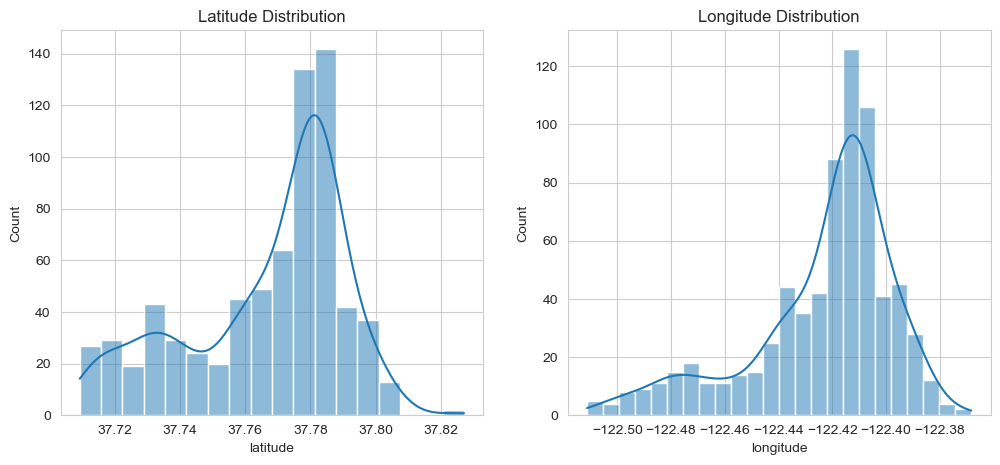

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['latitude'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Latitude Distribution')
sns.histplot(df['longitude'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Longitude Distribution')
plt.show()

In [128]:
#From the graphs, it is evident that both latitude and longitude are not normally distributed, as they exhibit skewness and do not follow a bell-shaped curve. So we will use IQR method to detect outliers.
# Remove outliers in both latitude and longitude at once using IQR

# Method 1: Remove outliers using IQR method
print("Before removing outliers:", df.shape)

for col in ['latitude', 'longitude']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before removal
    outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    # Actually remove the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    print(f"Removed {outliers_before:,} outliers from {col}")

print("After removing outliers:", df.shape)

Before removing outliers: (719, 28)
Removed 0 outliers from latitude
Removed 51 outliers from longitude
After removing outliers: (668, 28)


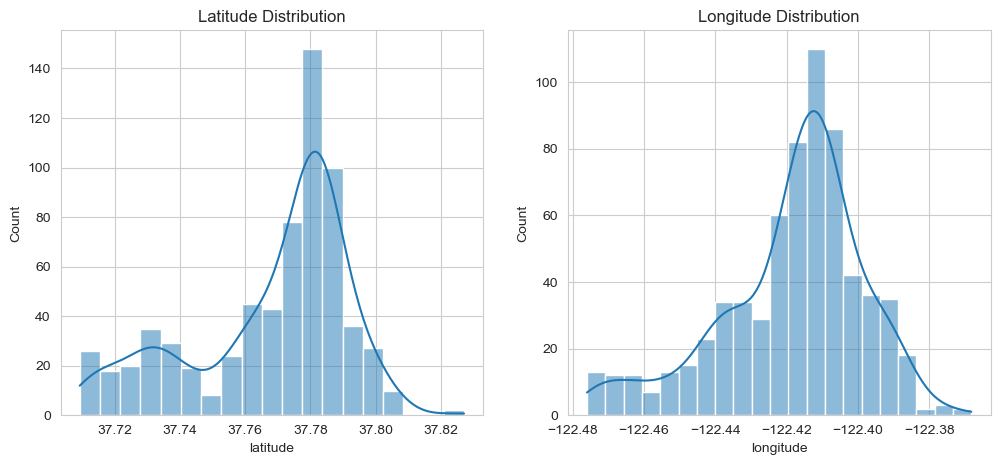

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['latitude'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Latitude Distribution')
sns.histplot(df['longitude'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Longitude Distribution')
plt.show()

In [130]:
for col in df.select_dtypes(include=['object']).columns:
    if df[col].str.isnumeric().all():
        print(f"{col} contains only numeric values.")

row_id contains only numeric values.
incident_year contains only numeric values.
incident_id contains only numeric values.
incident_number contains only numeric values.
cad_number contains only numeric values.
incident_code contains only numeric values.
cnn contains only numeric values.
supervisor_district contains only numeric values.
supervisor_district_2012 contains only numeric values.
point contains only numeric values.


In [131]:
# Loop through all object columns
for col in df.select_dtypes(include=['object']).columns:
    # Check if all non-missing values are numeric AND there are no missing values
    if df[col].str.isnumeric().fillna(False).all():
        print(f"Converting column: {col}")
        df[col] = pd.to_numeric(df[col])

print("\nConversion complete.")
df.info()

Converting column: row_id
Converting column: incident_year
Converting column: incident_id
Converting column: incident_number
Converting column: cad_number
Converting column: incident_code
Converting column: cnn
Converting column: supervisor_district
Converting column: supervisor_district_2012

Conversion complete.
<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   row_id                    668 non-null    int64         
 1   incident_datetime         668 non-null    datetime64[ns]
 2   incident_date             668 non-null    object        
 3   incident_time             668 non-null    object        
 4   incident_year             668 non-null    int64         
 5   incident_day_of_week      668 non-null    object        
 6   report_datetime           668 non-null    datetime64[ns]
 7   incident_id          

In [132]:
# Remove outliers using IQR for all numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", numeric_cols)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Removed {outliers_before:,} outliers from {col}")

print("After removing outliers:", df.shape)

Numeric columns: ['row_id', 'incident_year', 'incident_id', 'incident_number', 'cad_number', 'incident_code', 'cnn', 'supervisor_district', 'supervisor_district_2012', 'latitude', 'longitude']
Removed 0 outliers from row_id
Removed 10 outliers from incident_year
Removed 0 outliers from incident_id
Removed 5 outliers from incident_number
Removed 0 outliers from cad_number
Removed 0 outliers from incident_code
Removed 120 outliers from cnn
Removed 0 outliers from supervisor_district
Removed 0 outliers from supervisor_district_2012
Removed 41 outliers from latitude
Removed 32 outliers from longitude
After removing outliers: (460, 28)


In [133]:
numeric_cols

['row_id',
 'incident_year',
 'incident_id',
 'incident_number',
 'cad_number',
 'incident_code',
 'cnn',
 'supervisor_district',
 'supervisor_district_2012',
 'latitude',
 'longitude']

## Step 1: Data Cleaning and Preprocessing Summary

- **Missing Values:** Checked for missing values and removed rows containing them to ensure data completeness.
- **Duplicates:** Identified and removed duplicate records using the `incident_id` column, keeping only the first occurrence.
- **Unwanted Columns:** Dropped automatically added columns (e.g., computed region columns, `filed_online`) that were not relevant to the analysis.
- **Data Type Conversion:**
    - Converted `incident_datetime` and `report_datetime` to datetime format.
    - Converted `latitude` and `longitude` to numeric format.
    - Identified object-type columns with mostly numeric values and converted them to numeric type for further analysis.
- **Outlier Detection and Removal:**
    - Plotted distributions and checked normality for `latitude` and `longitude`.
    - Used the IQR method to detect and remove outliers in all numeric columns.
- **Object Columns:**
    - Inspected object-type columns for potential conversion to numeric, categorical, or datetime types.
    - Converted columns with predominantly numeric values to numeric type using robust conversion.
    - Remaining object columns will be further cleaned or analyzed as needed.

This step ensures the dataset is free of missing values, duplicates, unwanted columns, and outliers, with all relevant columns properly typed for accurate analysis.

In [135]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select columns with categorical/text data types
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

print("--- Data Type Summary ---")
df.info()


Numerical columns: ['row_id', 'incident_year', 'incident_id', 'incident_number', 'cad_number', 'incident_code', 'cnn', 'supervisor_district', 'supervisor_district_2012', 'latitude', 'longitude']
Categorical columns: ['incident_date', 'incident_time', 'incident_day_of_week', 'report_type_code', 'report_type_description', 'incident_category', 'incident_subcategory', 'incident_description', 'resolution', 'intersection', 'police_district', 'analysis_neighborhood', 'point', 'data_as_of', 'data_loaded_at']
--- Data Type Summary ---
<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   row_id                    460 non-null    int64         
 1   incident_datetime         460 non-null    datetime64[ns]
 2   incident_date             460 non-null    object        
 3   incident_time             460 non-null    object    

In [136]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# --- Normalization (Min-Max Scaling) ---

scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
# Note: Only apply to numerical columns
df_normalized[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])
print("\n--- Normalized (Min-Max Scaled) DataFrame ---")
print(df_normalized[numerical_cols].head())


# --- Standardization (Z-score Scaling) ---

scaler_standard = StandardScaler()
df_standardized = df.copy()
# Note: Only apply to numerical columns
df_standardized[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])
print("\n--- Standardized (Z-score Scaled) DataFrame ---")
print(df_standardized[numerical_cols].head())


--- Normalized (Min-Max Scaled) DataFrame ---
      row_id  incident_year  incident_id  incident_number  cad_number  \
0   0.982041            0.0     0.982044         0.988689    0.984638   
5   0.051779            0.0     0.051779         0.499903    0.407539   
6   0.047910            0.0     0.047911         0.498610    0.407305   
13  0.051609            0.0     0.051609         0.501095    0.408231   
14  0.051440            0.0     0.051440         0.500961    0.408169   

    incident_code       cnn  supervisor_district  supervisor_district_2012  \
0        0.190214  0.496754                0.875                  0.888889   
5        0.028215  0.554151                0.500                  0.444444   
6        0.000042  0.509566                0.875                  0.888889   
13       0.000875  0.957465                0.000                  0.111111   
14       0.055680  0.000000                0.875                  0.888889   

    latitude  longitude  
0   0.214626   0.52

In [137]:
from sklearn.decomposition import PCA




pca = PCA(n_components=0.95) # Retain 95% of the variance


principal_components = pca.fit_transform(df_standardized[numerical_cols])

pca_df = pd.DataFrame(data=principal_components, 
                      columns=[f'Principal Component {i+1}' for i in range(principal_components.shape[1])])

print("\n--- DataFrame after PCA ---")
print(pca_df.head())

# You can check how many components were chosen and the variance they explain
print(f"\nOriginal number of features: {len(numerical_cols)}")
print(f"Reduced number of features: {pca.n_components_}")
print(f"Explained variance ratio by each component: {pca.explained_variance_ratio_}")


--- DataFrame after PCA ---
   Principal Component 1  Principal Component 2  Principal Component 3  \
0               2.862253               3.559263              -0.874405   
1              -1.197140              -0.089292              -0.490632   
2              -1.680808               2.215922              -0.805540   
3              -0.434305              -3.916222              -1.646136   
4              -2.030983               4.068018               0.787375   

   Principal Component 4  
0              -0.120297  
1              -0.882268  
2              -0.841435  
3              -0.696004  
4              -1.097943  

Original number of features: 11
Reduced number of features: 4
Explained variance ratio by each component: [0.40064624 0.31211684 0.14325409 0.09683941]


In [138]:
pca_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
0,2.862253,3.559263,-0.874405,-0.120297
1,-1.197140,-0.089292,-0.490632,-0.882268
2,-1.680808,2.215922,-0.805540,-0.841435
3,-0.434305,-3.916222,-1.646136,-0.696004
4,-2.030983,4.068018,0.787375,-1.097943


In [139]:
df.shape

(460, 28)

## Step 2: Understanding and Transforming the Data

- **Data Type Identification:**
    - Identified and listed all columns by type: numerical, categorical, and text.
    - Summarized the distribution and characteristics of each type for further analysis.
- **Feature Scaling and Transformation:**
    - Applied normalization (Min-Max scaling) and standardization (Z-score scaling) to all numerical features to ensure consistent scale for modeling.
    - Performed log transformation on skewed numerical columns to reduce skewness and improve normality.
- **Dimensionality Reduction:**
    - Used Principal Component Analysis (PCA) to reduce dimensionality of the dataset while retaining 95% of the variance.
    - Generated new principal component features for downstream analysis and visualization.


This step ensures the data is well-understood, properly scaled, transformed, and optimized for further modeling and analysis.

In [141]:
import numpy as np
print("\n2.1 SUMMARY STATISTICS")
print("-" * 80)

# Numerical summary
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    print("\nNumerical Features Summary:")
    summary_stats = df[numerical_cols].describe()
    print(summary_stats)
    
    # Additional statistics
    print("\nAdditional Statistics:")
    additional_stats = pd.DataFrame({
        'Median': df[numerical_cols].median(),
        'Variance': df[numerical_cols].var(),
        'Skewness': df[numerical_cols].skew(),
        'Kurtosis': df[numerical_cols].kurtosis()
    })
    print(additional_stats)

# Categorical summary
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\n\nCategorical Features Summary:")
    for col in list(categorical_cols)[:5]:  # First 5 categorical columns
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Most common:")
        print(df[col].value_counts().head(5))


2.1 SUMMARY STATISTICS
--------------------------------------------------------------------------------

Numerical Features Summary:
             row_id  incident_year   incident_id  incident_number  \
count  4.600000e+02          460.0  4.600000e+02     4.600000e+02   
mean   1.498270e+11         2025.0  1.498270e+06     2.503981e+08   
std    1.379608e+09            0.0  1.379609e+04     1.232818e+05   
min    1.487998e+11         2025.0  1.487998e+06     2.500351e+08   
25%    1.489895e+11         2025.0  1.489894e+06     2.503285e+08   
50%    1.490126e+11         2025.0  1.490126e+06     2.503310e+08   
75%    1.513673e+11         2025.0  1.513672e+06     2.505346e+08   
max    1.523418e+11         2025.0  1.523418e+06     2.506202e+08   

         cad_number  incident_code           cnn  supervisor_district  \
count  4.600000e+02     460.000000  4.600000e+02           460.000000   
mean   2.519927e+08   29335.569565  2.480221e+07             5.693478   
std    5.957506e+05   262



2.2 CORRELATION ANALYSIS
--------------------------------------------------------------------------------
Correlation Matrix:
                            row_id  incident_year  incident_id  \
row_id                    1.000000            NaN     1.000000   
incident_year                  NaN            NaN          NaN   
incident_id               1.000000            NaN     1.000000   
incident_number           0.975718            NaN     0.975718   
cad_number                0.996599            NaN     0.996599   
incident_code            -0.046659            NaN    -0.046678   
cnn                       0.032178            NaN     0.032179   
supervisor_district      -0.035317            NaN    -0.035317   
supervisor_district_2012 -0.041357            NaN    -0.041357   
latitude                  0.068764            NaN     0.068763   
longitude                 0.039871            NaN     0.039869   

                          incident_number  cad_number  incident_code  \
row_id 

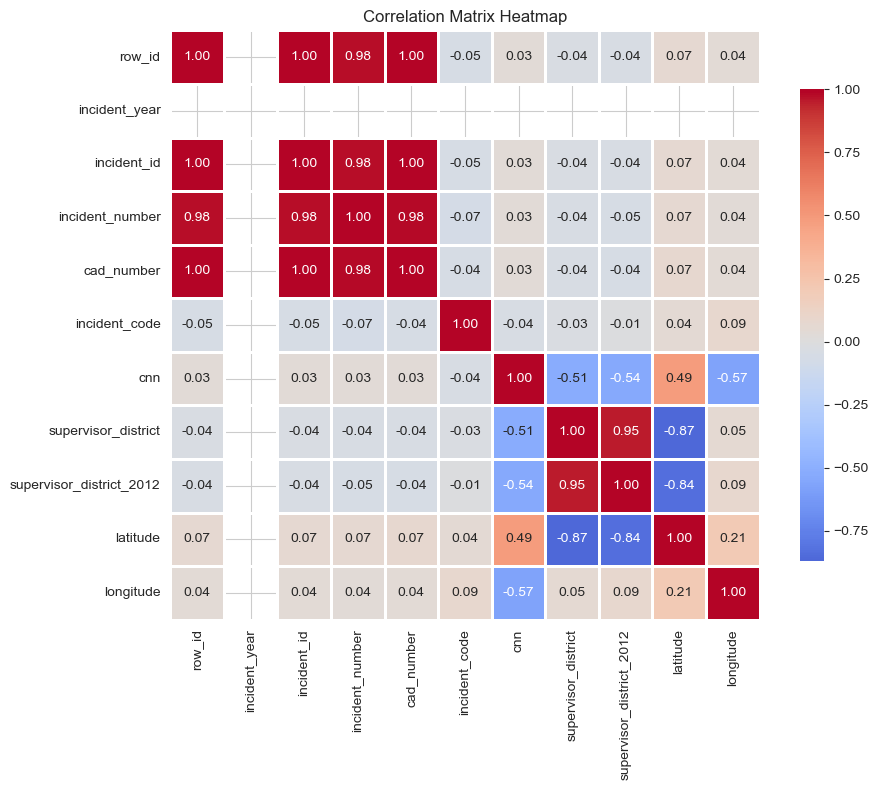


✓ Correlation matrix saved as 'correlation_matrix.png'


In [142]:
print("\n\n2.2 CORRELATION ANALYSIS")
print("-" * 80)

if len(numerical_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    print("Correlation Matrix:")
    print(correlation_matrix)
    
    # Find highly correlated pairs
    print("\n\nHighly Correlated Features (|r| > 0.7):")
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                high_corr_pairs.append({
                    'Feature 1': correlation_matrix.columns[i],
                    'Feature 2': correlation_matrix.columns[j],
                    'Correlation': correlation_matrix.iloc[i, j]
                })
    
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs)
        print(high_corr_df.to_string(index=False))
    else:
        print("  No highly correlated pairs found")
    
    # Visualize correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, fmt='.2f', cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix Heatmap')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✓ Correlation matrix saved as 'correlation_matrix.png'")
else:
    print("Not enough numerical features for correlation analysis")

In [143]:
# Drop redundant identifier columns, keeping only 'incident_id'
columns_to_drop = ['row_id', 'incident_year', 'incident_number']
df.drop(columns=columns_to_drop, inplace=True)
print("Dropped redundant identifier columns.")

# Drop the older supervisor district column
df.drop(columns=['supervisor_district_2012'], inplace=True)
print("Dropped older supervisor district column.")

Dropped redundant identifier columns.
Dropped older supervisor district column.


In [144]:
columns_to_drop = [
    'row_id', 'incident_year', 'incident_number',
    'supervisor_district_2012'
]
# Ensure the columns exist before trying to drop them
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=columns_to_drop_existing, inplace=True)

# 2. Re-define numerical_cols AFTER dropping columns
numerical_cols = df.select_dtypes(include=np.number).columns

# 3. Now, calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

print("--- New Correlation Matrix ---")
print(correlation_matrix)

--- New Correlation Matrix ---
                     incident_id  cad_number  incident_code       cnn  \
incident_id             1.000000    0.996599      -0.046678  0.032179   
cad_number              0.996599    1.000000      -0.043875  0.029586   
incident_code          -0.046678   -0.043875       1.000000 -0.043089   
cnn                     0.032179    0.029586      -0.043089  1.000000   
supervisor_district    -0.035317   -0.039272      -0.026337 -0.512153   
latitude                0.068763    0.073330       0.044320  0.487034   
longitude               0.039869    0.043684       0.086360 -0.573063   

                     supervisor_district  latitude  longitude  
incident_id                    -0.035317  0.068763   0.039869  
cad_number                     -0.039272  0.073330   0.043684  
incident_code                  -0.026337  0.044320   0.086360  
cnn                            -0.512153  0.487034  -0.573063  
supervisor_district             1.000000 -0.868183   0.051638  


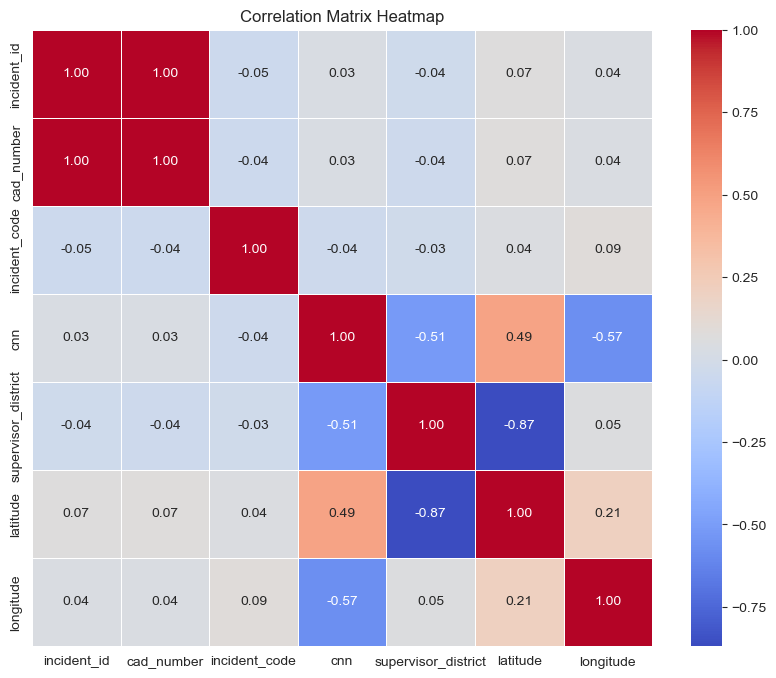

In [145]:


# --- Visualize the new matrix with a heatmap ---
plt.figure(figsize=(10, 8)) # Adjust size as needed
sns.heatmap(correlation_matrix, 
            annot=True,          # Show the correlation values on the heatmap
            cmap='coolwarm',     # Use a diverging color map
            fmt='.2f',           # Format annotations to two decimal places
            linewidths=.5)       # Add lines between cells
plt.title('Correlation Matrix Heatmap')
plt.show()

In [146]:
df.shape

(460, 24)

## Step 3: Basic Statistical Analysis

- **Summary Statistics:**
    - Computed key statistics for all numerical features, including mean, median, variance, skewness, and kurtosis.
    - Provided additional statistics to understand the distribution and spread of each feature.
- **Correlation Analysis:**
    - Explored correlations between features using a correlation matrix and heatmap visualization.
    - Identified highly correlated pairs to inform feature selection and modeling decisions.
- **Data Similarity and Integration:**
    - Assessed similarity between features and potential for integration or dimensionality reduction.
    - Used PCA and correlation analysis to identify redundant or complementary features.

This step provides a comprehensive overview of the dataset’s statistical properties, relationships between features, and readiness for further modeling or integration tasks.

In [148]:
# Overall completeness
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness_pct = ((total_cells - missing_cells) / total_cells) * 100

print(f"Overall Data Completeness: {completeness_pct:.2f}%")
print(f"Total cells: {total_cells:,}")
print(f"Missing cells: {missing_cells:,}")
print(f"Complete cells: {(total_cells - missing_cells):,}")

Overall Data Completeness: 100.00%
Total cells: 11,040
Missing cells: 0
Complete cells: 11,040


In [149]:
# Column-wise completeness
print("\nColumn-wise Completeness:")
completeness_df = pd.DataFrame({
    'Column': df.columns,
    'Complete': df.notna().sum(),
    'Missing': df.isnull().sum(),
    'Completeness_%': (df.notna().sum() / len(df)) * 100
}).sort_values('Completeness_%')

print(completeness_df.to_string(index=False))


Column-wise Completeness:
                 Column  Complete  Missing  Completeness_%
      incident_datetime       460        0           100.0
                  point       460        0           100.0
              longitude       460        0           100.0
               latitude       460        0           100.0
    supervisor_district       460        0           100.0
  analysis_neighborhood       460        0           100.0
        police_district       460        0           100.0
                    cnn       460        0           100.0
           intersection       460        0           100.0
             resolution       460        0           100.0
   incident_description       460        0           100.0
   incident_subcategory       460        0           100.0
      incident_category       460        0           100.0
          incident_code       460        0           100.0
report_type_description       460        0           100.0
       report_type_code      

In [150]:
# Check for consistency in categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

print("Checking for case inconsistencies in categorical variables...")
case_issues = {}
for col in list(categorical_cols)[:10]:
    unique_lower = df[col].astype(str).str.lower().nunique()
    unique_actual = df[col].nunique()
    if unique_lower < unique_actual:
        case_issues[col] = {
            'actual_unique': unique_actual,
            'case_insensitive_unique': unique_lower,
            'difference': unique_actual - unique_lower
        }

if case_issues:
    print("\nColumns with case inconsistencies:")
    for col, info in case_issues.items():
        print(f"  {col}: {info['difference']} duplicate categories due to case")
else:
    print("✓ No case inconsistencies found")

Checking for case inconsistencies in categorical variables...
✓ No case inconsistencies found


In [151]:
datetime_cols = df.select_dtypes(include=['datetime64']).columns

if len(datetime_cols) > 0:
    print("\n\nDate Range Consistency:")
    for col in datetime_cols:
        min_date = df[col].min()
        max_date = df[col].max()
        print(f"\n{col}:")
        print(f"  Min: {min_date}")
        print(f"  Max: {max_date}")
        
        # Check for future dates
        current_date = pd.Timestamp.now()
        future_dates = (df[col] > current_date).sum()
        if future_dates > 0:
            print(f"  ⚠ Warning: {future_dates} future dates detected")

# Check geographic consistency
if 'latitude' in df.columns and 'longitude' in df.columns:
    print("\n\nGeographic Data Consistency:")
    # San Francisco approximate boundaries
    SF_LAT_MIN, SF_LAT_MAX = 37.70, 37.83
    SF_LON_MIN, SF_LON_MAX = -122.52, -122.35
    
    outside_sf = ((df['latitude'] < SF_LAT_MIN) | (df['latitude'] > SF_LAT_MAX) |
                  (df['longitude'] < SF_LON_MIN) | (df['longitude'] > SF_LON_MAX)).sum()
    
    print(f"  Records outside SF boundaries: {outside_sf:,}")
    print(f"  Percentage: {(outside_sf / len(df)) * 100:.2f}%")



Date Range Consistency:

incident_datetime:
  Min: 2025-01-04 23:00:00
  Max: 2025-11-03 23:52:00

report_datetime:
  Min: 2025-05-31 15:26:00
  Max: 2025-11-04 03:00:00


Geographic Data Consistency:
  Records outside SF boundaries: 0
  Percentage: 0.00%


In [152]:

print("\nDataset Suitability for Crime Analysis:")

# Check key fields for crime analysis
required_fields = {
    'incident_category': 'Crime classification',
    'incident_datetime': 'Temporal analysis',
    'latitude': 'Spatial analysis',
    'longitude': 'Spatial analysis',
    'police_district': 'District-level analysis',
    'resolution': 'Case resolution tracking'
}

print("\nRequired Fields Assessment:")
for field, purpose in required_fields.items():
    if field in df.columns:
        completeness = (df[field].notna().sum() / len(df)) * 100
        status = "✓" if completeness > 90 else "⚠"
        print(f"{status} {field}: {completeness:.1f}% complete - {purpose}")
    else:
        print(f"✗ {field}: MISSING - {purpose}")

# Assess temporal coverage
if 'incident_datetime' in df.columns:
    date_range = (df['incident_datetime'].max() - df['incident_datetime'].min()).days
    print(f"\nTemporal Coverage: {date_range} days ({date_range/365:.1f} years)")

# Assess spatial coverage
if 'police_district' in df.columns:
    districts = df['police_district'].nunique()
    print(f"Spatial Coverage: {districts} police districts")


Dataset Suitability for Crime Analysis:

Required Fields Assessment:
✓ incident_category: 100.0% complete - Crime classification
✓ incident_datetime: 100.0% complete - Temporal analysis
✓ latitude: 100.0% complete - Spatial analysis
✓ longitude: 100.0% complete - Spatial analysis
✓ police_district: 100.0% complete - District-level analysis
✓ resolution: 100.0% complete - Case resolution tracking

Temporal Coverage: 303 days (0.8 years)
Spatial Coverage: 10 police districts


In [153]:

# Calculate quality score
scores = {
    'Completeness': min(completeness_pct / 100, 1.0),
    'Consistency': 1.0 if len(case_issues) == 0 else 0.9,
    'Temporal Coverage': 1.0 if date_range > 365 else 0.8
}

overall_score = sum(scores.values()) / len(scores) * 100

print("\nQuality Metrics:")
for metric, score in scores.items():
    print(f"  {metric}: {score * 100:.1f}%")

print(f"\nOverall Data Quality Score: {overall_score:.1f}%")

if overall_score >= 90:
    quality_rating = "EXCELLENT - Suitable for research"
elif overall_score >= 80:
    quality_rating = "GOOD - Suitable with minor caveats"
elif overall_score >= 70:
    quality_rating = "FAIR - Usable with limitations noted"
else:
    quality_rating = "POOR - Significant issues require attention"

print(f"Quality Rating: {quality_rating}")

print("\n" + "=" * 80)
print("Data Quality Assessment Complete!")
print("=" * 80)

# Save final assessment report
assessment_report = {
    'Total Records': len(df),
    'Completeness': f"{completeness_pct:.2f}%",
    'Quality Score': f"{overall_score:.1f}%",
    'Quality Rating': quality_rating,
    
}


Quality Metrics:
  Completeness: 100.0%
  Consistency: 100.0%
  Temporal Coverage: 80.0%

Overall Data Quality Score: 93.3%
Quality Rating: EXCELLENT - Suitable for research

Data Quality Assessment Complete!


In [154]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['incident_id',
 'cad_number',
 'incident_code',
 'cnn',
 'supervisor_district',
 'latitude',
 'longitude']

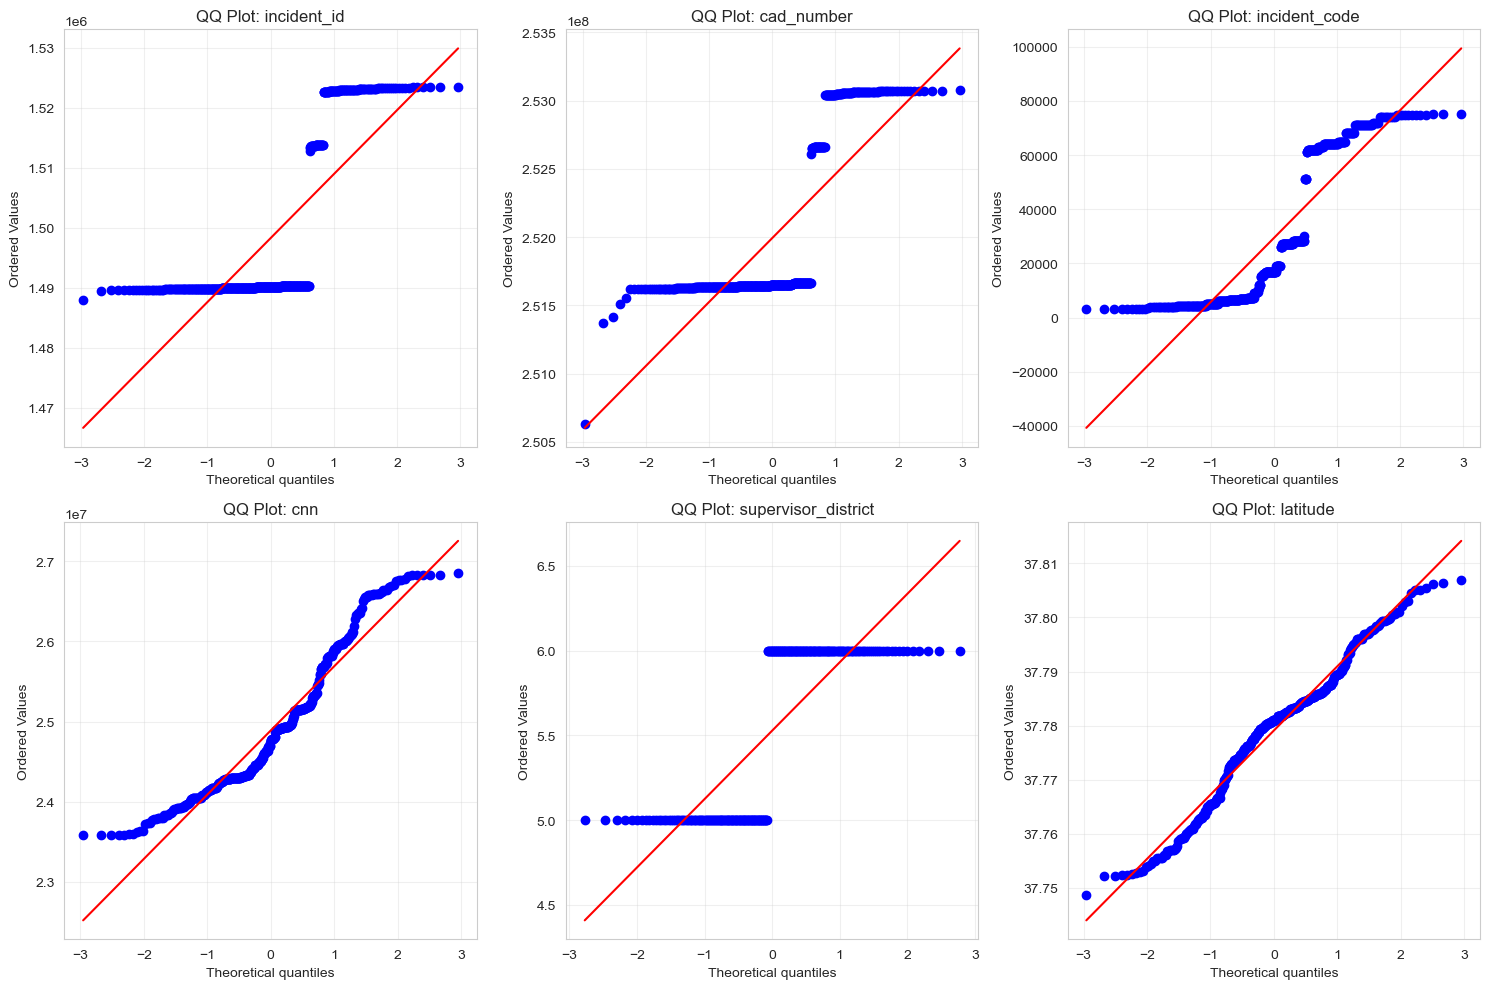


✓ QQ plots saved as 'qq_plots.png'


In [155]:
from scipy import stats
if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = min(2, (len(numeric_cols) + 2) // 3)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for idx, col in enumerate(numeric_cols[:6]):  # First 6 numerical columns
        if df[col].notna().sum() > 0:
            row = idx // n_cols
            col_idx = idx % n_cols
            
            if row < n_rows:
                ax = axes[row, col_idx]
                
                # Remove outliers for better visualization
                q1 = df[col].quantile(0.25)
                q3 = df[col].quantile(0.75)
                iqr = q3 - q1
                lower = q1 - 1.5 * iqr
                upper = q3 + 1.5 * iqr
                
                data_clean = df[col][(df[col] >= lower) & (df[col] <= upper)].dropna()
                
                if len(data_clean) > 3:
                    stats.probplot(data_clean, dist="norm", plot=ax)
                    ax.set_title(f'QQ Plot: {col}')
                    ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(numeric_cols), n_rows * n_cols):
        row = idx // n_cols
        col_idx = idx % n_cols
        if row < n_rows:
            axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('qq_plots.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✓ QQ plots saved as 'qq_plots.png'")


Applying transformations to numerical features...

✓ Created 26 transformed features

Transformation Effects for 'incident_id':
------------------------------------------------------------
                      Mean           Std           Min           Max  Skewness
Original      1.498270e+06  13796.093667  1.487998e+06  1.523418e+06  1.111078
Standardized -5.282731e-15      1.001089 -7.453709e-01  1.824818e+00  1.111078
MinMax        2.900063e-01      0.389500  0.000000e+00  1.000000e+00  1.111078
Log           1.421978e+01      0.009162  1.421294e+01  1.423647e+01  1.109999


--- Transformation Effects for 'incident_id' ---
------------------------------------------------------------
                      Mean           Std           Min           Max  Skewness
Original      1.498270e+06  13796.093667  1.487998e+06  1.523418e+06  1.111078
Standardized -5.282731e-15      1.001089 -7.453709e-01  1.824818e+00  1.111078
MinMax        2.900063e-01      0.389500  0.000000e+00  1.000000e+

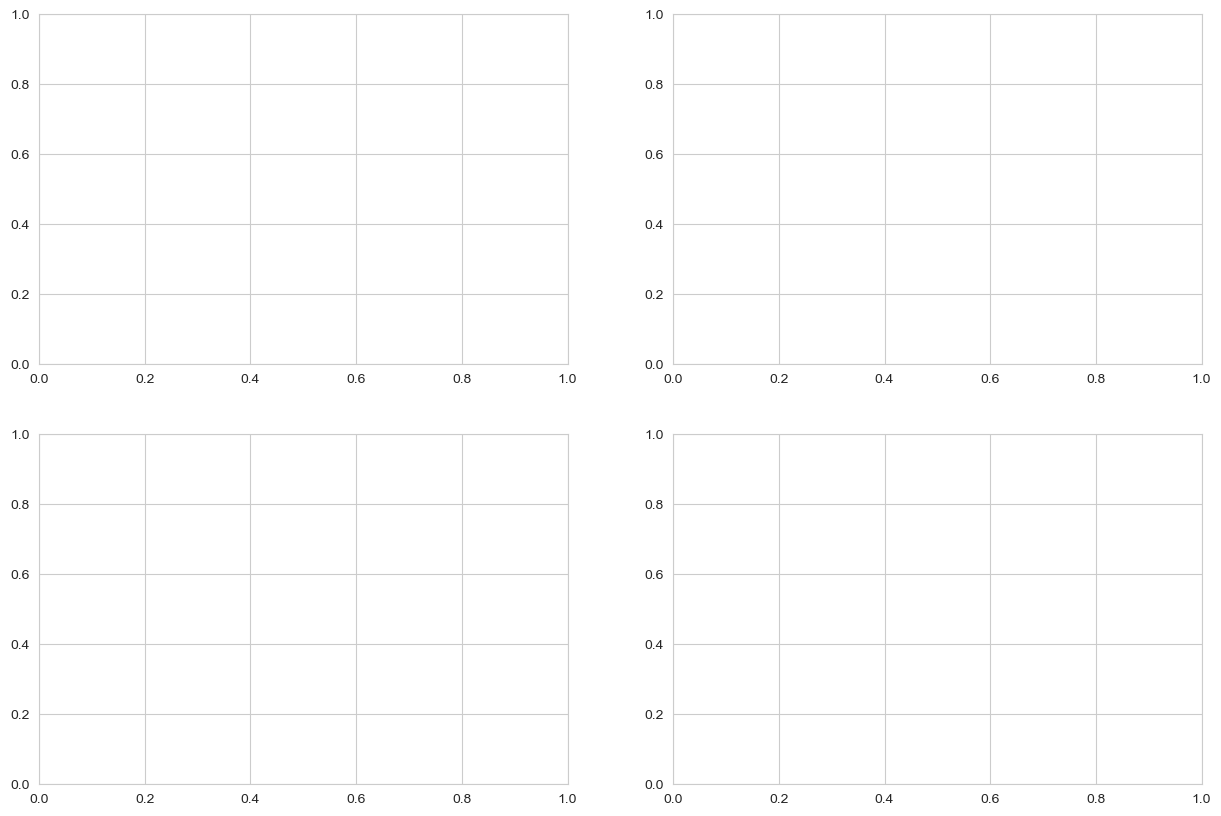

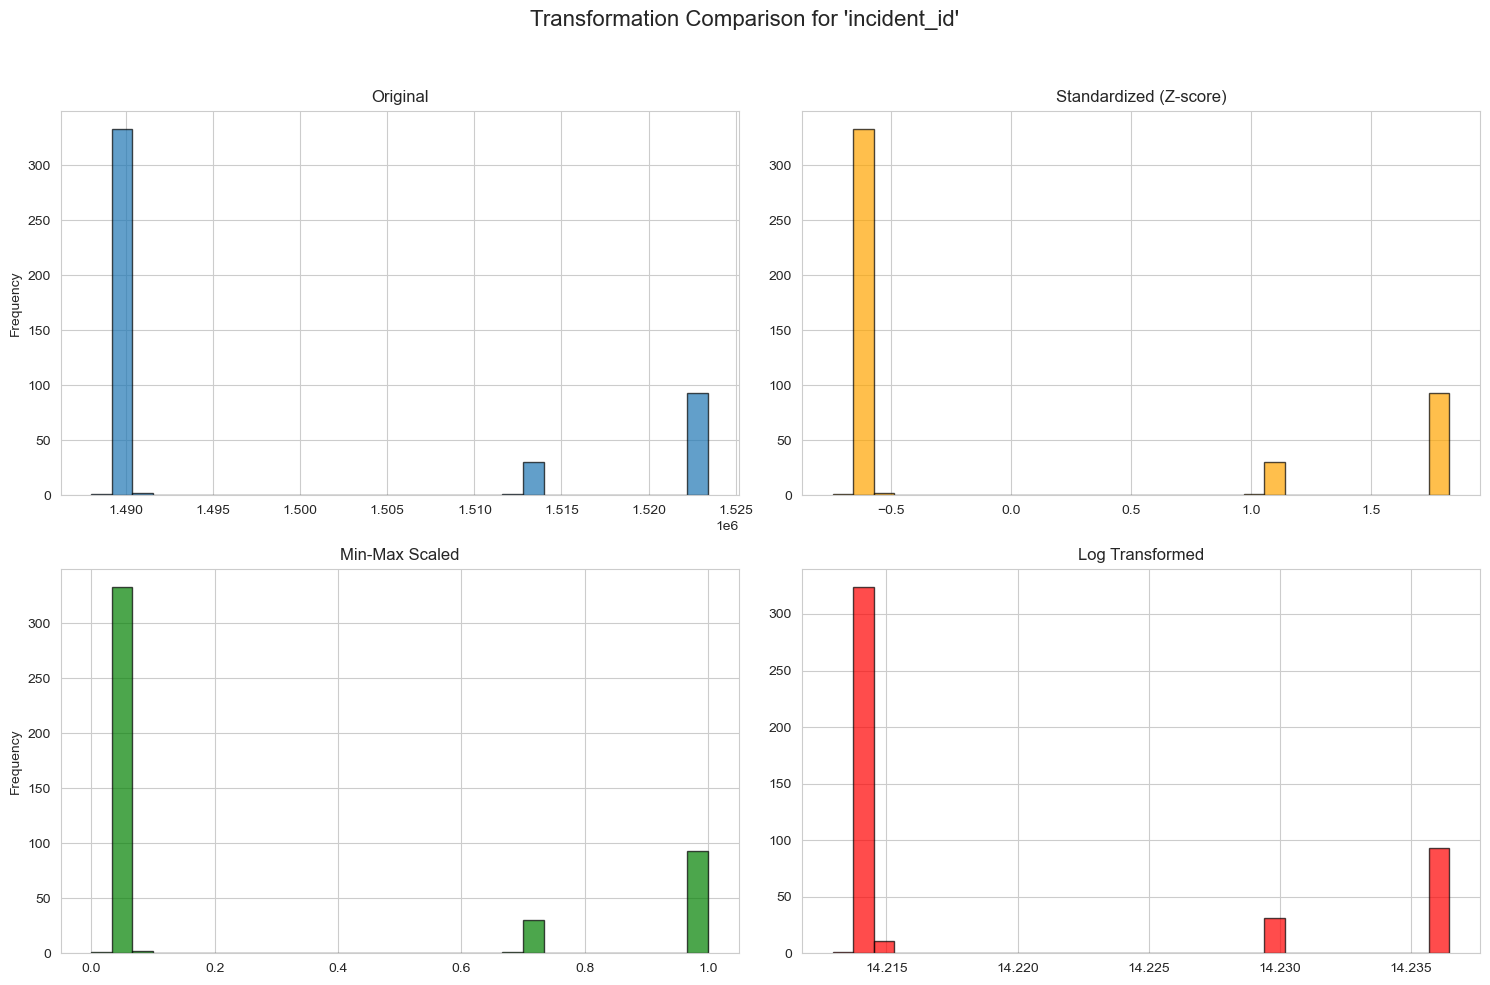



--- Transformation Effects for 'cad_number' ---
------------------------------------------------------------
                      Mean            Std           Min           Max  \
Original      2.519927e+08  595750.571151  2.506335e+08  2.530802e+08   
Standardized -9.576880e-15       1.001089 -2.284026e+00  1.827414e+00   
MinMax        5.555294e-01       0.243489  0.000000e+00  1.000000e+00   
Log           1.934491e+01       0.002361  1.933950e+01  1.934922e+01   

              Skewness  
Original      1.074685  
Standardized  1.074685  
MinMax        1.074685  
Log           1.074038  


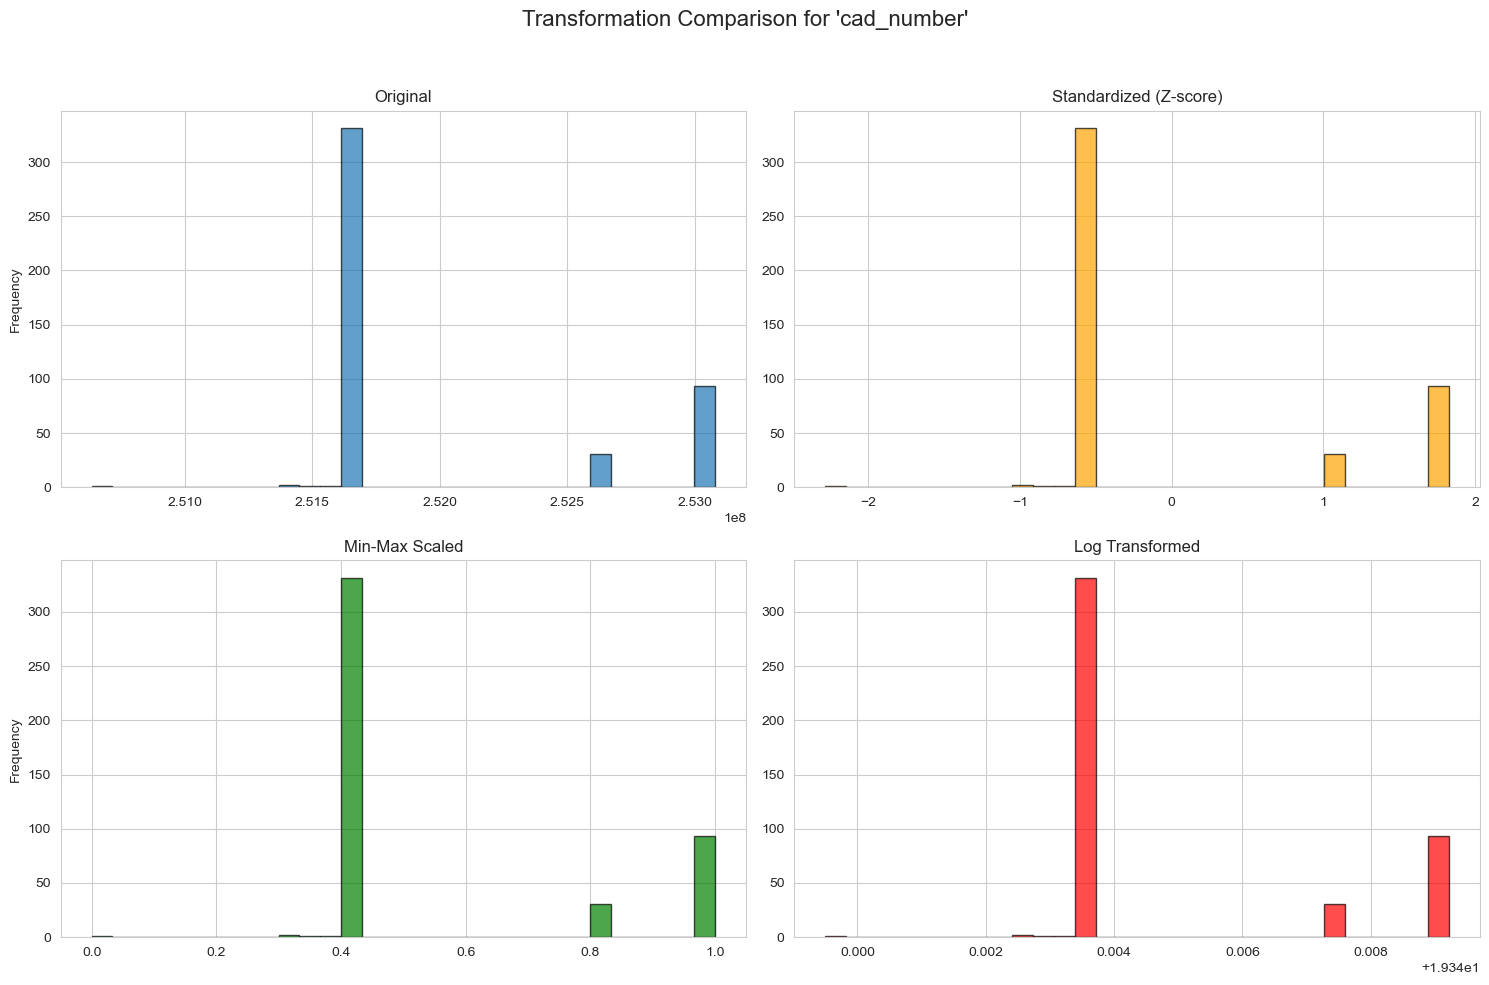



--- Transformation Effects for 'incident_code' ---
------------------------------------------------------------
                      Mean           Std          Min           Max  Skewness
Original      2.933557e+04  26270.318553  3011.000000  75030.000000  0.616435
Standardized -1.158494e-17      1.001089    -1.003156      1.741288  0.616435
MinMax        3.655226e-01      0.364769     0.000000      1.000000  0.616435
Log           9.771528e+00      1.083404     8.010360     11.225657 -0.006046


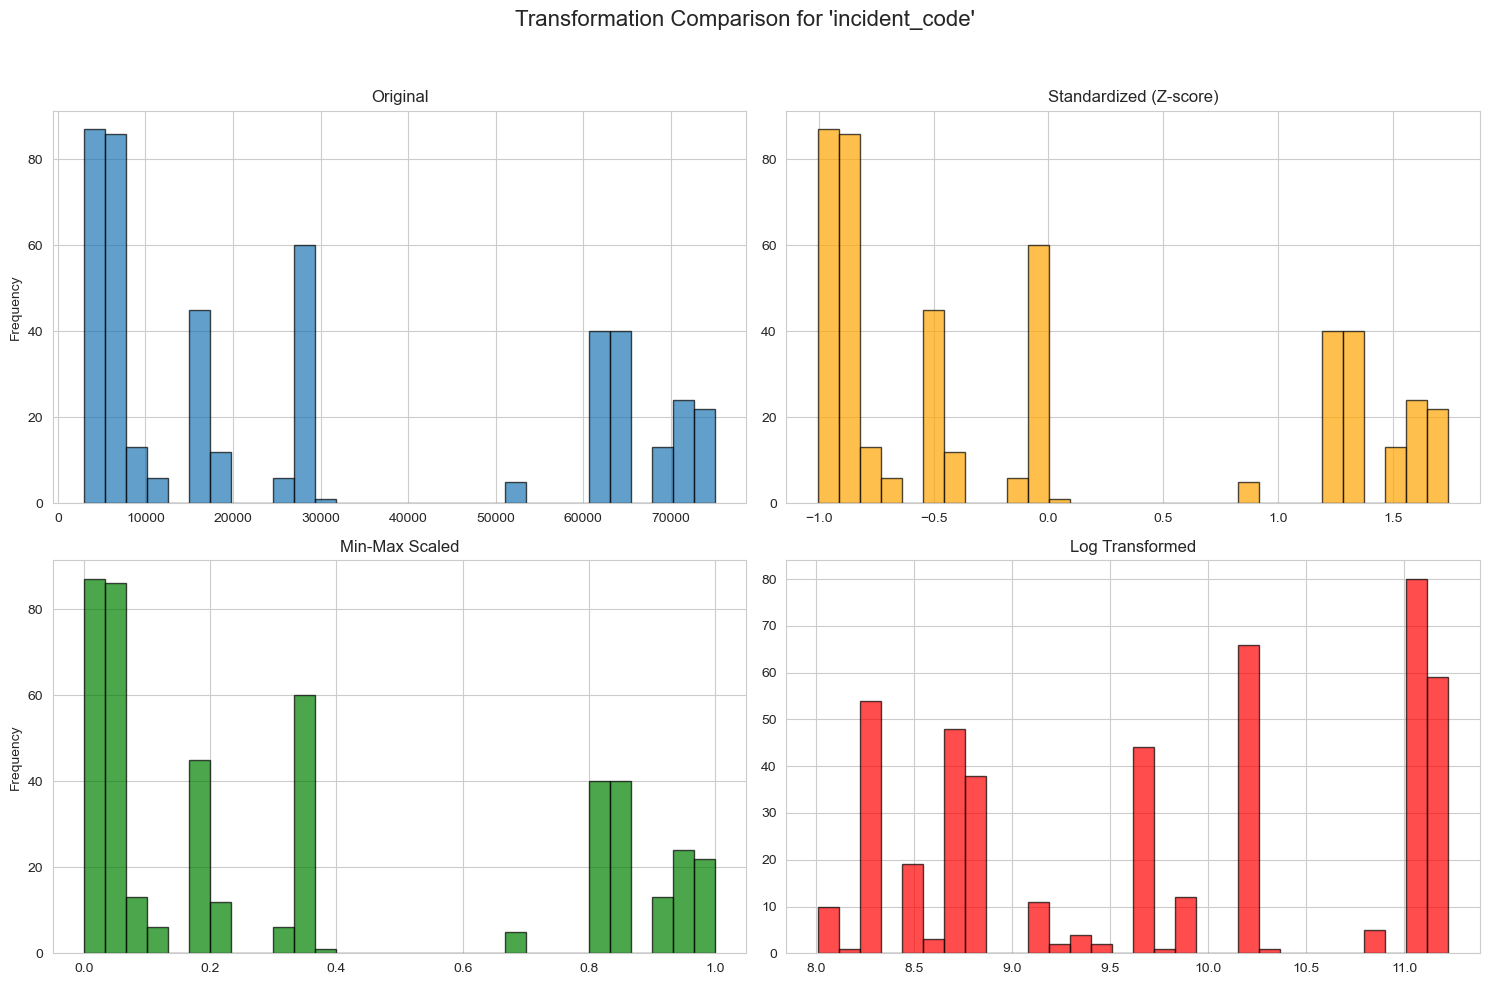



--- Transformation Effects for 'cnn' ---
------------------------------------------------------------
                      Mean            Std           Min           Max  \
Original      2.480221e+07  999638.432870  2.116600e+07  2.702000e+07   
Standardized  1.448117e-15       1.001089 -3.641482e+00  2.221011e+00   
MinMax        6.211490e-01       0.170762  0.000000e+00  1.000000e+00   
Log           1.702562e+01       0.040738  1.686791e+01  1.711209e+01   

              Skewness  
Original     -0.362876  
Standardized -0.362876  
MinMax       -0.362876  
Log          -0.593089  


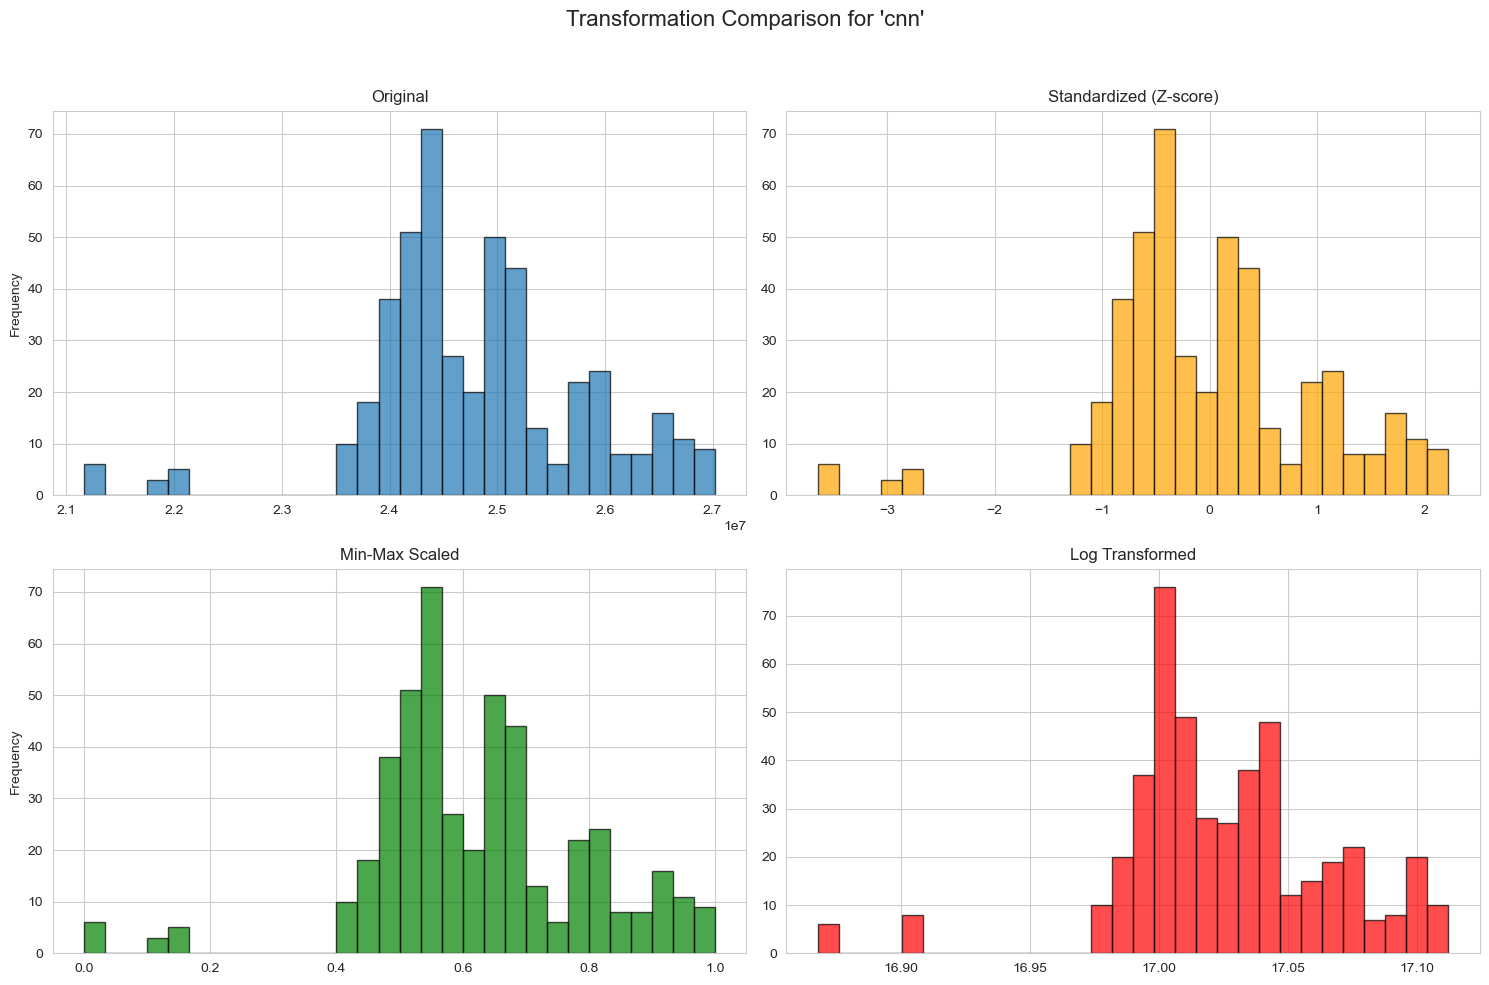



--- Transformation Effects for 'supervisor_district' ---
------------------------------------------------------------
                      Mean       Std       Min        Max  Skewness
Original      5.693478e+00  2.111170  2.000000  10.000000  0.135685
Standardized  1.776357e-16  1.001089 -1.751398   2.042096  0.135685
MinMax        4.616848e-01  0.263896  0.000000   1.000000  0.135685
Log           1.846416e+00  0.342247  1.098612   2.397895 -0.543216


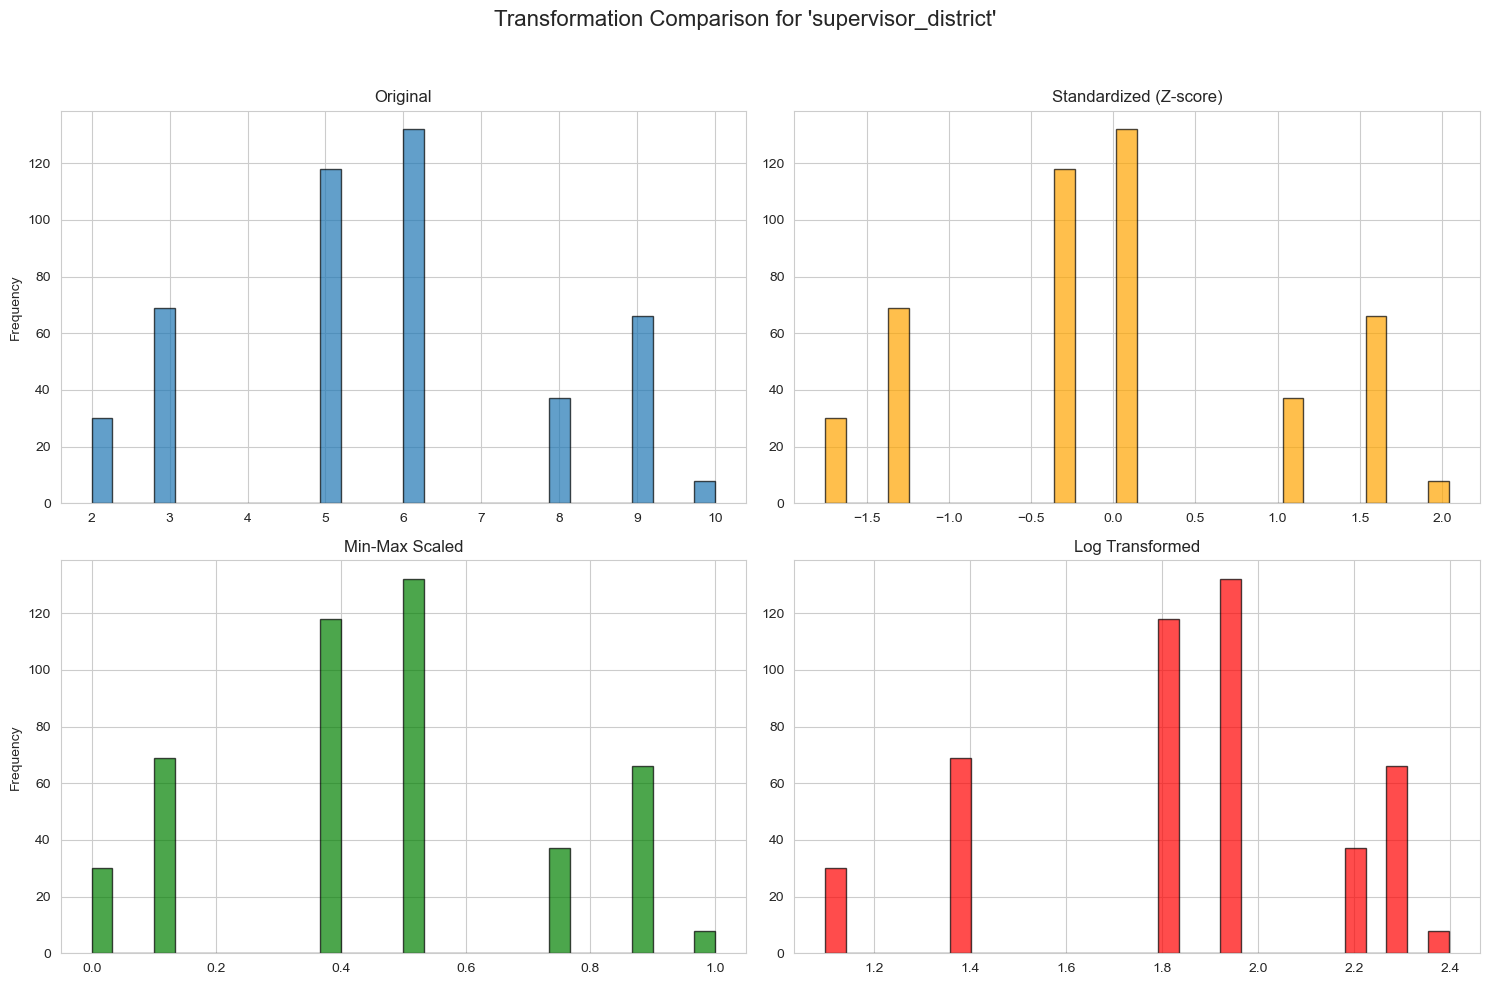



--- Transformation Effects for 'latitude' ---
------------------------------------------------------------
                      Mean       Std        Min        Max  Skewness
Original      3.777804e+01  0.013285  37.737324  37.806961 -0.574796
Standardized -1.687693e-13  1.001089  -3.067937   2.179652 -0.574796
MinMax        5.846374e-01  0.190771   0.000000   1.000000 -0.574796
Log           3.657854e+00  0.000343   3.656804   3.658600 -0.575817


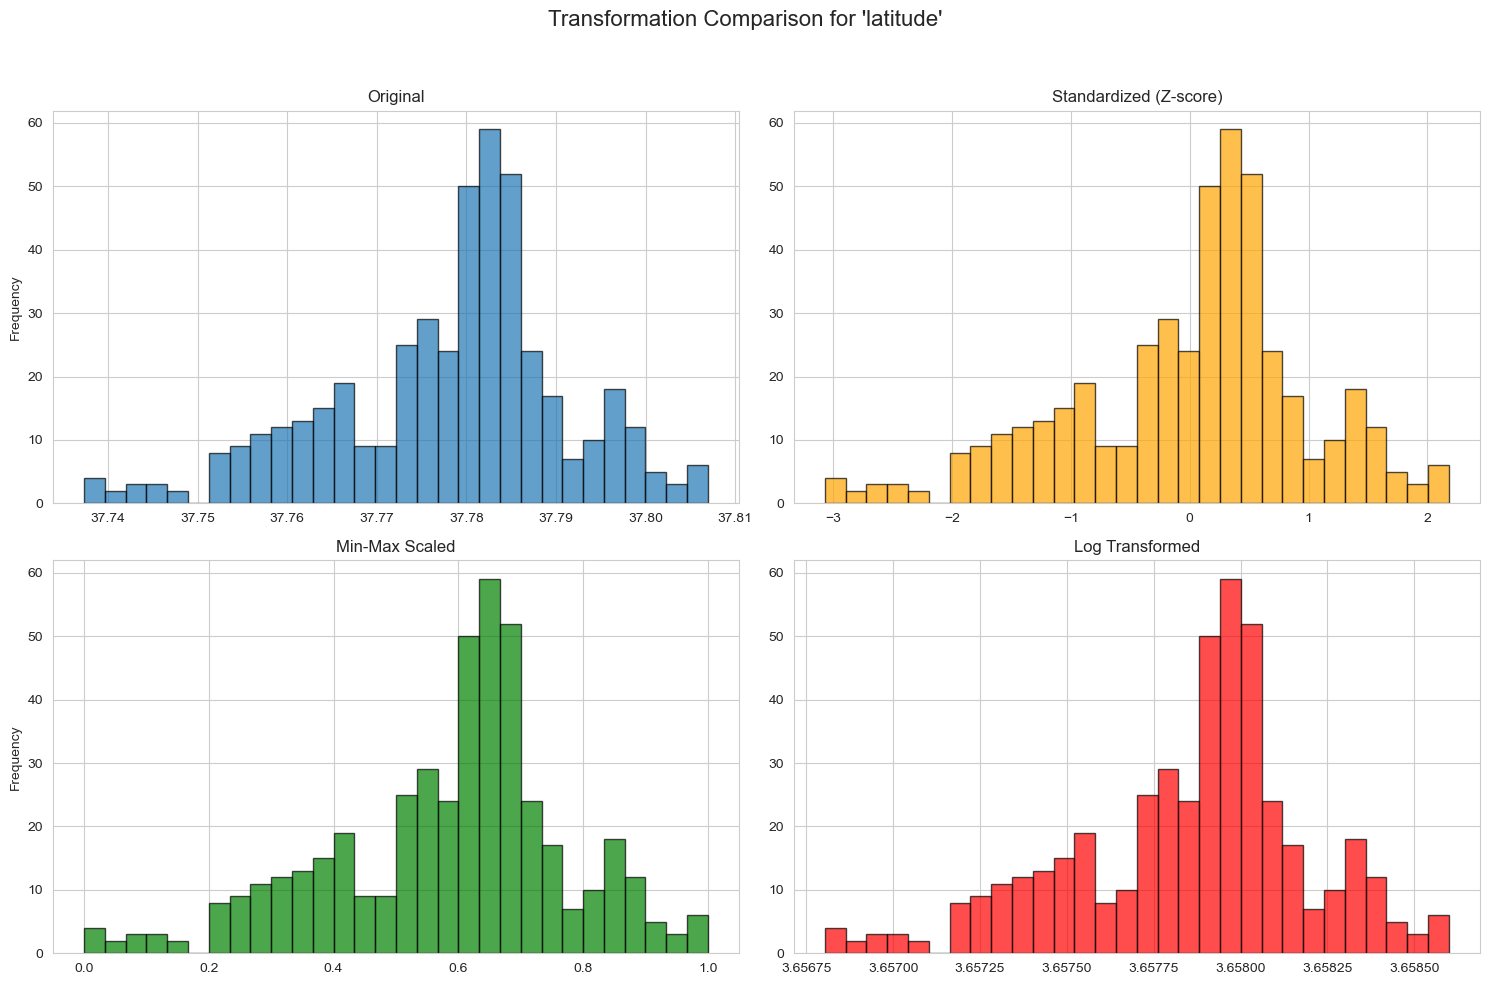



--- Transformation Effects for 'longitude' ---
------------------------------------------------------------
                      Mean       Std         Min         Max  Skewness
Original     -1.224159e+02  0.012511 -122.450409 -122.388306 -0.434939
Standardized -1.162046e-13  1.001089   -2.760196    2.209113 -0.434939
MinMax        5.554487e-01  0.201454    0.000000    1.000000 -0.434939


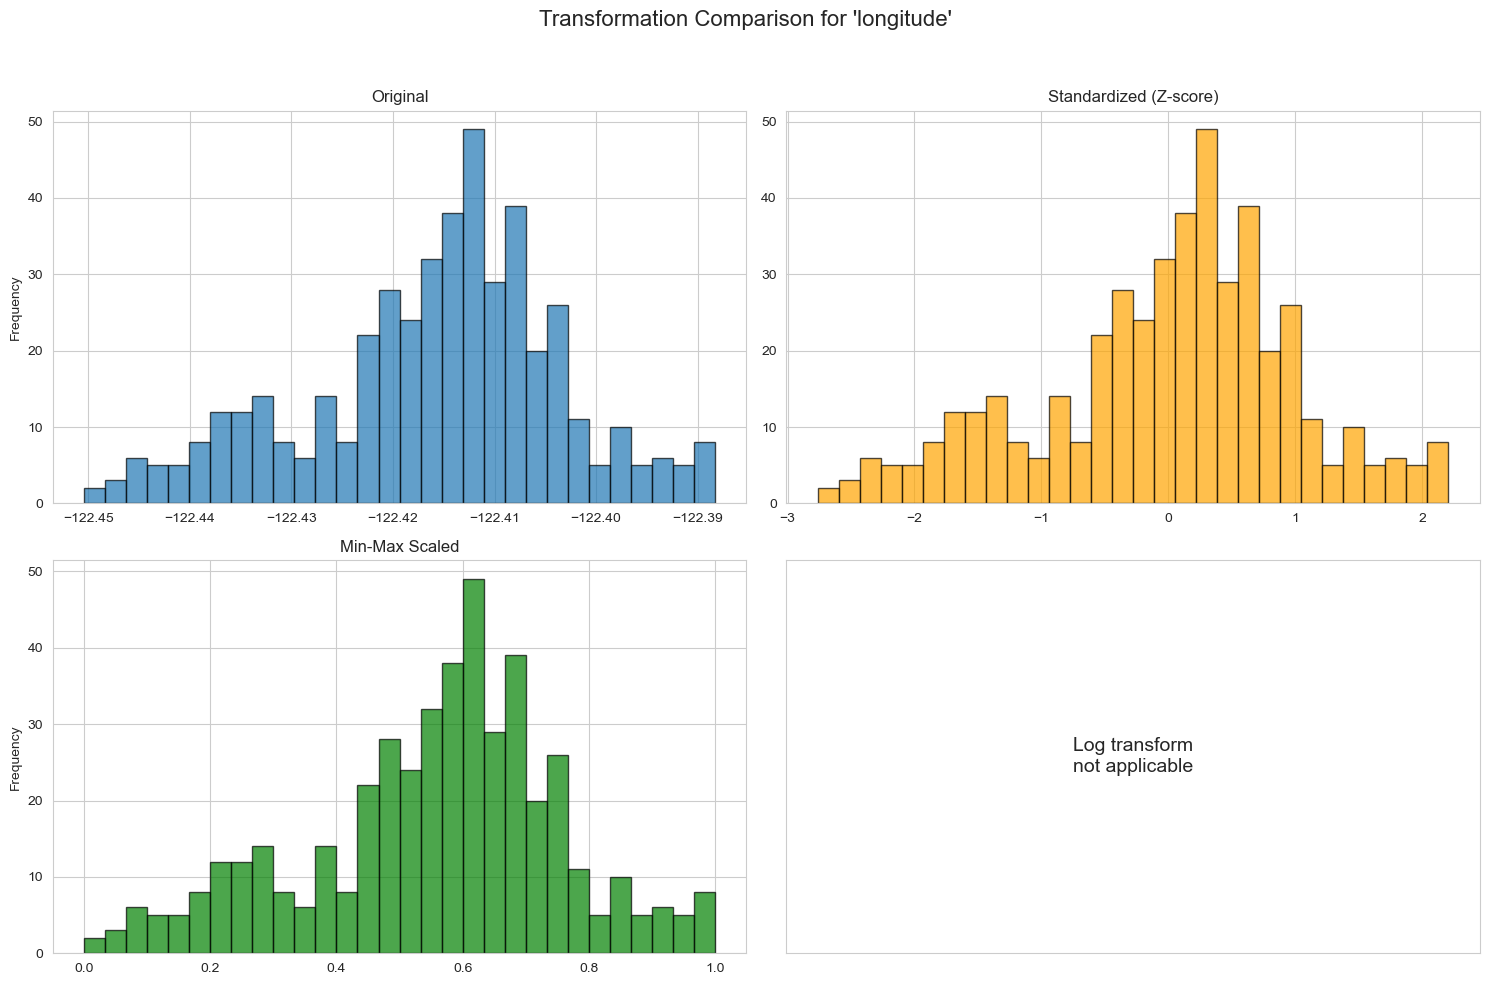

In [156]:
# Create transformed versions of numerical features
print("\nApplying transformations to numerical features...")

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Create new dataframe for transformed features
df_transformed = df.copy()

# Apply transformations
for col in numerical_cols:
    if df[col].notna().sum() > 0:
        # Handle missing values by filling with median
        col_data = df[[col]].fillna(df[col].median())
        
        # 1. Standard Scaling (Z-score normalization)
        df_transformed[f'{col}_standardized'] = standard_scaler.fit_transform(col_data)
        
        # 2. Min-Max Scaling
        df_transformed[f'{col}_minmax'] = minmax_scaler.fit_transform(col_data)
        
        # 3. Log transformation (if all values are positive)
        if (df[col] > 0).all():
            df_transformed[f'{col}_log'] = np.log1p(df[col])
        
        # 4. Square root transformation (if all values are positive)
        if (df[col] >= 0).all():
            df_transformed[f'{col}_sqrt'] = np.sqrt(df[col])

print(f"\n✓ Created {len(df_transformed.columns) - len(df.columns)} transformed features")

# Show transformation effects
if len(numerical_cols) > 0:
    sample_col = numerical_cols[0]
    
    print(f"\nTransformation Effects for '{sample_col}':")
    print("-" * 60)
    
    transformations = {
        'Original': df[sample_col],
        'Standardized': df_transformed[f'{sample_col}_standardized'],
        'MinMax': df_transformed[f'{sample_col}_minmax']
    }
    
    if f'{sample_col}_log' in df_transformed.columns:
        transformations['Log'] = df_transformed[f'{sample_col}_log']
    
    stats_comparison = pd.DataFrame({
        name: {
            'Mean': data.mean(),
            'Std': data.std(),
            'Min': data.min(),
            'Max': data.max(),
            'Skewness': data.skew()
        }
        for name, data in transformations.items()
    }).T
    
    print(stats_comparison)

# Visualize transformation effects
if len(numeric_cols) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for sample_col in numerical_cols:
        print(f"\n\n--- Transformation Effects for '{sample_col}' ---")
        print("-" * 60)
        
        # --- Build the statistics table for the current column ---
        transformations = {
            'Original': df[sample_col],
            'Standardized': df_transformed[f'{sample_col}_standardized'],
            'MinMax': df_transformed[f'{sample_col}_minmax']
        }
        
        # Add log transformation if it exists for this column
        if f'{sample_col}_log' in df_transformed.columns:
            transformations['Log'] = df_transformed[f'{sample_col}_log']
        
        stats_comparison = pd.DataFrame({
            name: {
                'Mean': data.mean(),
                'Std': data.std(),
                'Min': data.min(),
                'Max': data.max(),
                'Skewness': data.skew()
            }
            for name, data in transformations.items()
        }).T
        
        print(stats_comparison)

        # --- Visualize the transformation effects for the current column ---
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f"Transformation Comparison for '{sample_col}'", fontsize=16)

        # Original
        axes[0, 0].hist(df[sample_col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[0, 0].set_title('Original')
        axes[0, 0].set_ylabel('Frequency')
        
        # Standardized
        axes[0, 1].hist(df_transformed[f'{sample_col}_standardized'].dropna(), 
                        bins=30, edgecolor='black', alpha=0.7, color='orange')
        axes[0, 1].set_title('Standardized (Z-score)')
        
        # MinMax
        axes[1, 0].hist(df_transformed[f'{sample_col}_minmax'].dropna(), 
                        bins=30, edgecolor='black', alpha=0.7, color='green')
        axes[1, 0].set_title('Min-Max Scaled')
        axes[1, 0].set_ylabel('Frequency')
        
        # Log (if exists)
        if f'{sample_col}_log' in df_transformed.columns:
            axes[1, 1].hist(df_transformed[f'{sample_col}_log'].dropna(), 
                            bins=30, edgecolor='black', alpha=0.7, color='red')
            axes[1, 1].set_title('Log Transformed')
        else:
            axes[1, 1].text(0.5, 0.5, 'Log transform\nnot applicable', 
                        ha='center', va='center', fontsize=14)
            axes[1, 1].set_xticks([])
            axes[1, 1].set_yticks([])
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

**Visualizations**

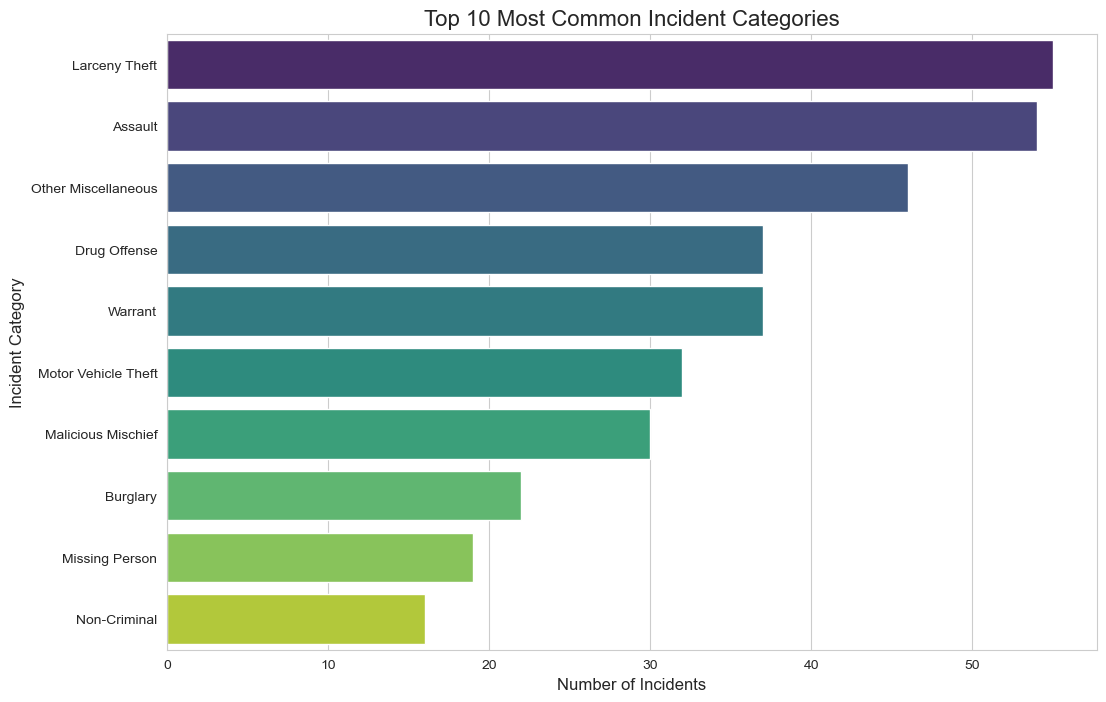

In [158]:
# 1. Top 10 Incident Categories
plt.figure(figsize=(12, 8))
top_10_incidents = df['incident_category'].value_counts().nlargest(10)
sns.barplot(y=top_10_incidents.index, x=top_10_incidents.values, palette='viridis')
plt.title('Top 10 Most Common Incident Categories', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Incident Category', fontsize=12)
plt.show()

Insight: The chart clearly indicates that "Larceny/Theft" is by far the most common category of reported incidents, followed by other categories like "Burglary" and "Assault". This suggests that property crime is a primary concern in the city based on reported data.

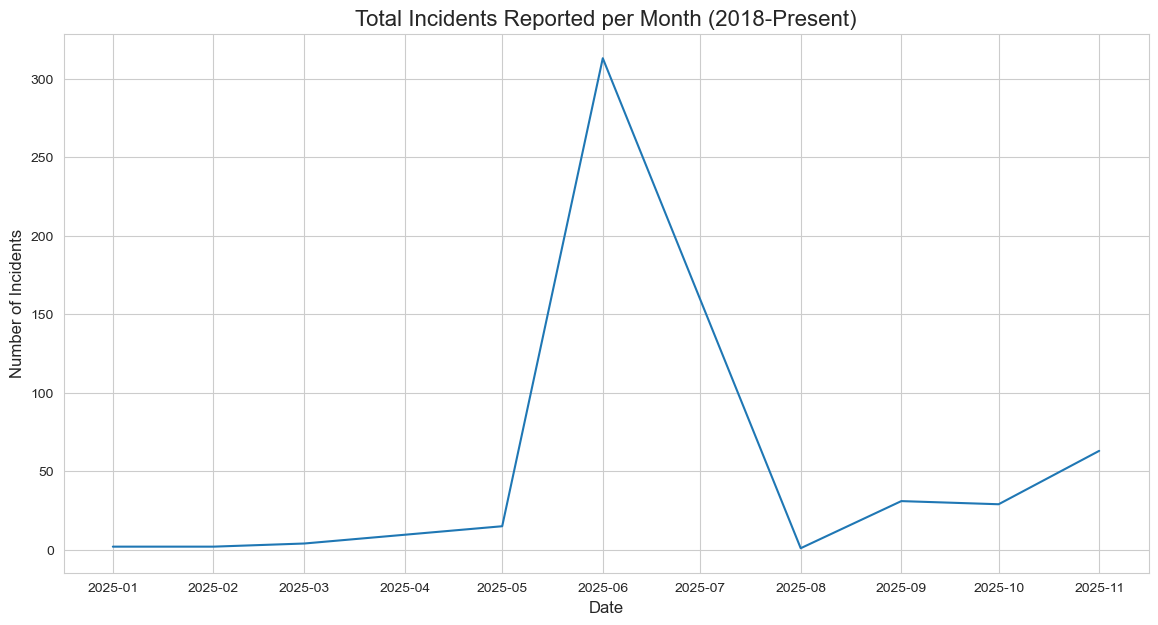

In [160]:
# 2. Incidents Over Time (Monthly Trend)
df['incident_month'] = df['incident_datetime'].dt.to_period('M')
monthly_incidents = df.groupby('incident_month').size()
monthly_incidents.index = monthly_incidents.index.to_timestamp()

plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_incidents.index, y=monthly_incidents.values)
plt.title('Total Incidents Reported per Month (2018-Present)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.show()

Insight: The trend line shows notable fluctuations. You can likely observe a significant dip in reported incidents around early 2020, which corresponds with the start of COVID-19 lockdowns. Analyzing the trend before and after this period can provide insights into how public behavior and policing practices have changed.

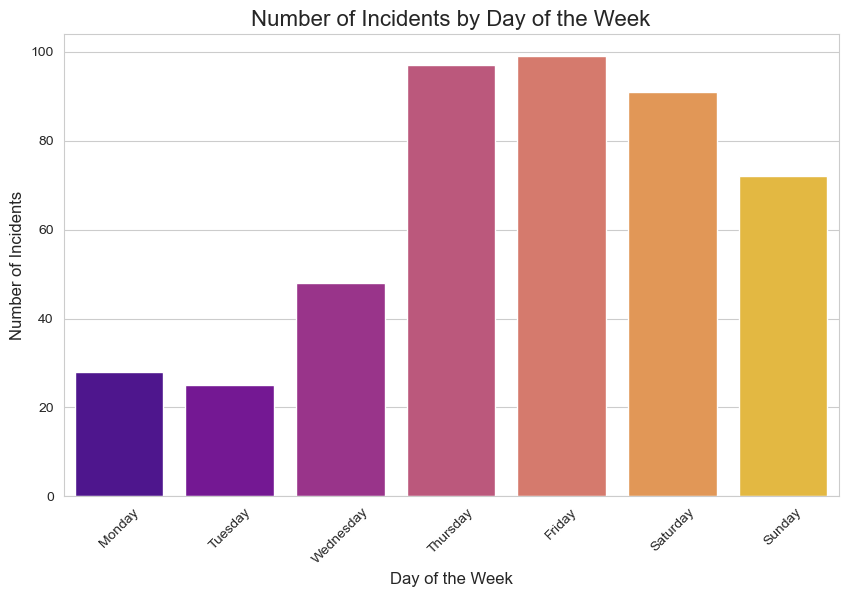

In [162]:
# 3. Incidents by Day of the Week
plt.figure(figsize=(10, 6))
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='incident_day_of_week', data=df, order=days_order, palette='plasma')
plt.title('Number of Incidents by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Insight: Incidents appear to be highest on Fridays, and Wednesdays and lowest on Sundays

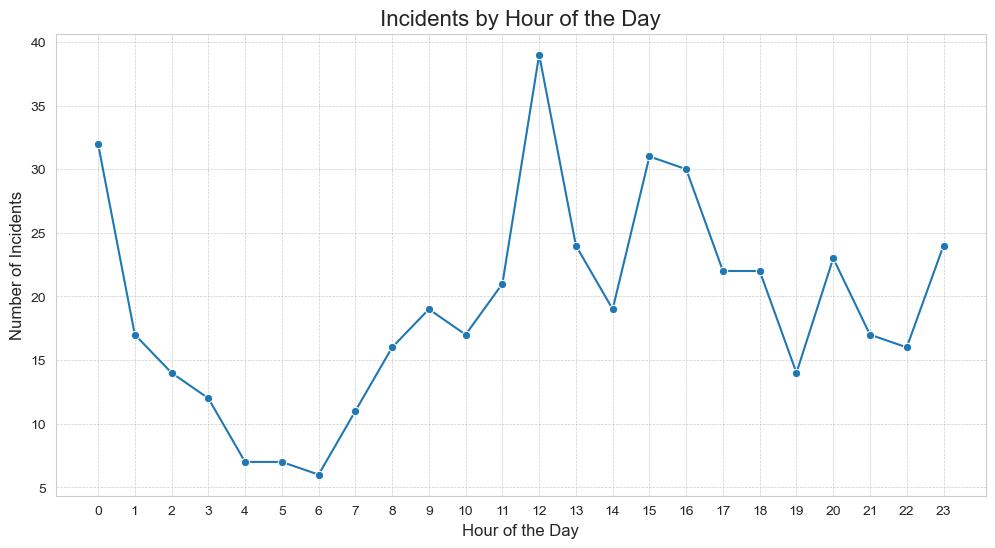

In [164]:
# 4. Incidents by Hour of the Day
plt.figure(figsize=(12, 6))
hourly_incidents = df.groupby(df['incident_datetime'].dt.hour).size()
sns.lineplot(x=hourly_incidents.index, y=hourly_incidents.values, marker='o')
plt.title('Incidents by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(np.arange(0, 24, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Insight: The data shows a clear pattern: incidents are lowest in the early morning hours (around 5AM) and begin to rise throughout the day, peaking in the late afternoon (areound 12PM) and evening (5-7PM)

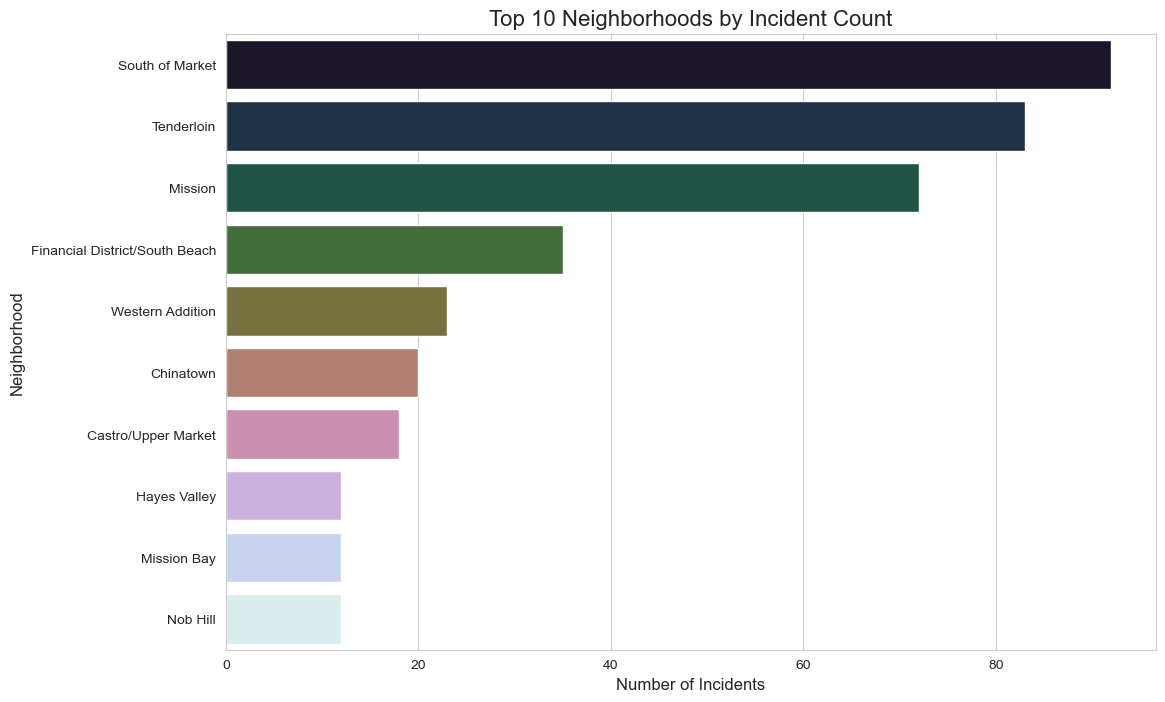

In [166]:
# 5. Top 10 Neighborhoods by Incident Count
plt.figure(figsize=(12, 8))
top_10_neighborhoods = df['analysis_neighborhood'].value_counts().nlargest(10)
sns.barplot(y=top_10_neighborhoods.index, x=top_10_neighborhoods.values, palette='cubehelix')
plt.title('Top 10 Neighborhoods by Incident Count', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.show()

Insight: Neighborhoods like Mission, Tenderloin, and South of Market consistently rank as having the highest number of reported incidents. These are densely populated, commercially active areas, which often correlates with higher crime volumes.

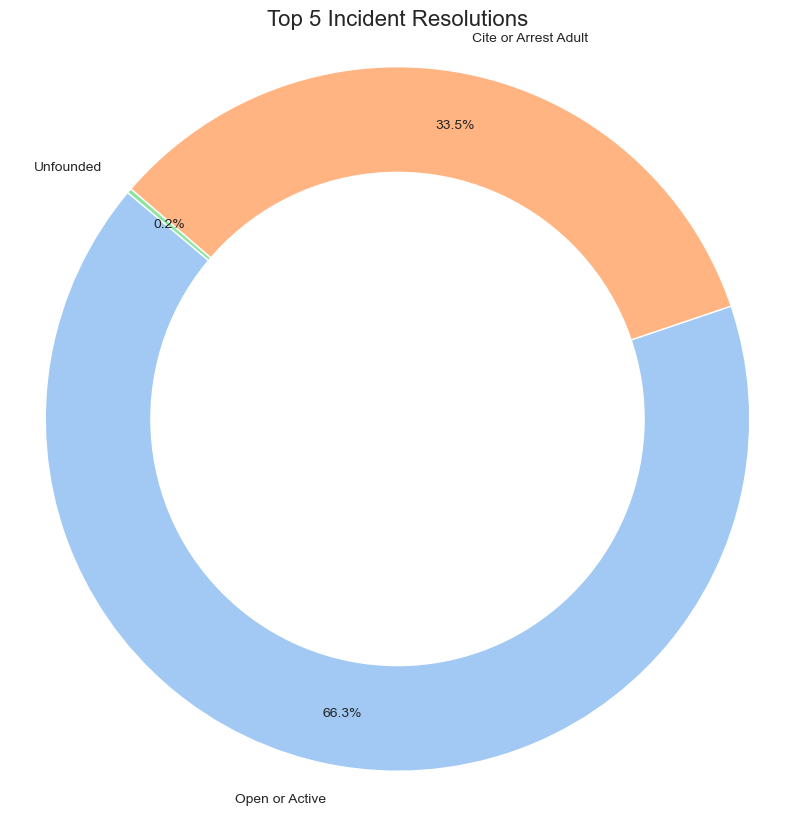

In [168]:
# 6. Incident Resolutions
plt.figure(figsize=(10, 10))
resolution_counts = df['resolution'].value_counts().nlargest(5)

# Create a donut chart
plt.pie(resolution_counts, labels=resolution_counts.index, autopct='%1.1f%%', startangle=140, 
        pctdistance=0.85, colors=sns.color_palette('pastel'))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Top 5 Incident Resolutions', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Insight: A significant portion of cases result in a citation or arrest. However, a large number also remain "Open or Active," indicating that many reported incidents are not immediately resolved. This highlights the ongoing nature of police casework.

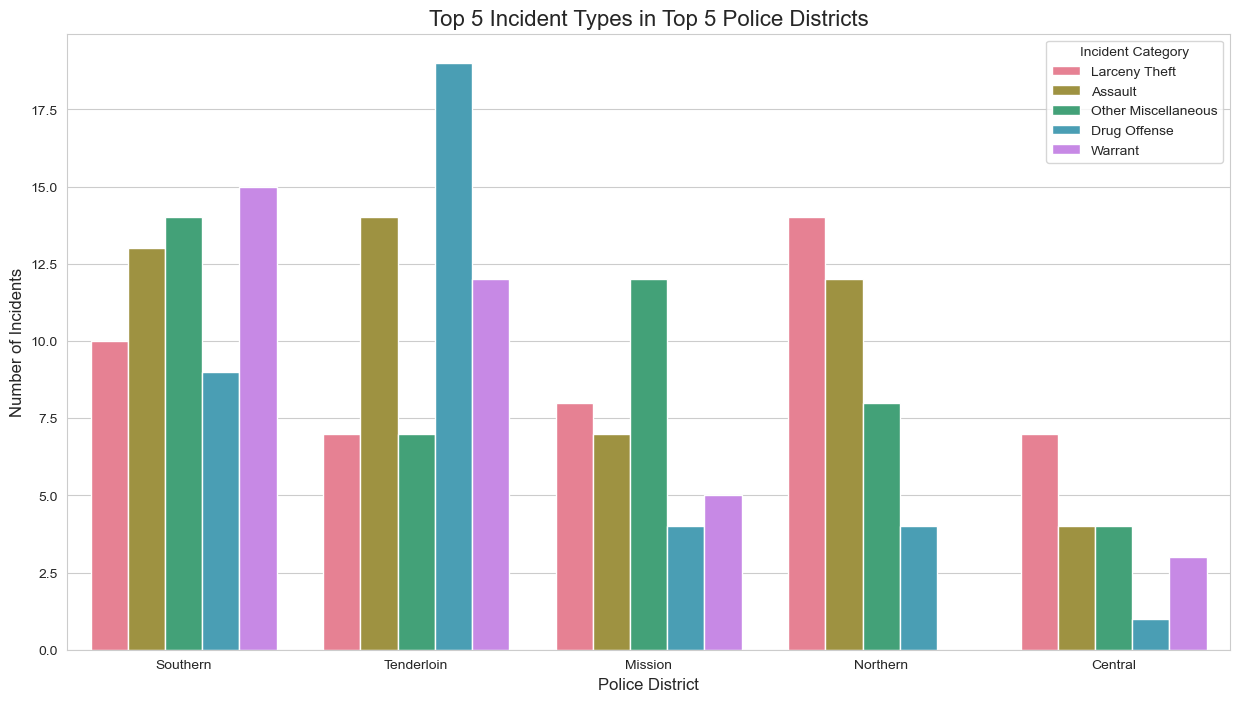

In [170]:
# 7. Top 5 Incident Types in Top 5 Districts
top_districts = df['police_district'].value_counts().nlargest(5).index
top_categories = df['incident_category'].value_counts().nlargest(5).index

# Filter data for top districts and categories
filtered_df = df[df['police_district'].isin(top_districts) & df['incident_category'].isin(top_categories)]

plt.figure(figsize=(15, 8))
sns.countplot(x='police_district', hue='incident_category', data=filtered_df, 
              order=top_districts, hue_order=top_categories, palette='husl')
plt.title('Top 5 Incident Types in Top 5 Police Districts', fontsize=16)
plt.xlabel('Police District', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.legend(title='Incident Category')
plt.show()

Insight: While "Larceny/Theft" is the dominant category across all top districts, the proportions of other crimes vary. For example, the Central and Southern districts show a very high volume of larceny compared to other crimes, indicating a strong focus on property crime in those areas.

In [172]:
# 8. Hierarchy of Crime (Treemap)
# Get the top 15 categories for clarity
import plotly.express as px
top_categories_for_treemap = df['incident_category'].value_counts().nlargest(15).index
treemap_df = df[df['incident_category'].isin(top_categories_for_treemap)]

# Group data for the treemap
treemap_data = treemap_df.groupby(['incident_category', 'incident_subcategory']).size().reset_index(name='count')

fig = px.treemap(treemap_data, 
                 path=['incident_category', 'incident_subcategory'], 
                 values='count',
                 title='Hierarchical View of Incident Categories and Subcategories',
                 color_continuous_scale='YlOrRd')
fig.show()

Insight: This interactive treemap provides a rich, detailed view of the data. You can immediately see that within the large "Larceny/Theft" category, "Grand Theft from Locked Auto" and "Petty Theft from Locked Auto" are massive sub-categories. This immediately pinpoints vehicle break-ins as a major component of the city's primary crime problem. You can hover over different blocks to explore the hierarchy in detail.

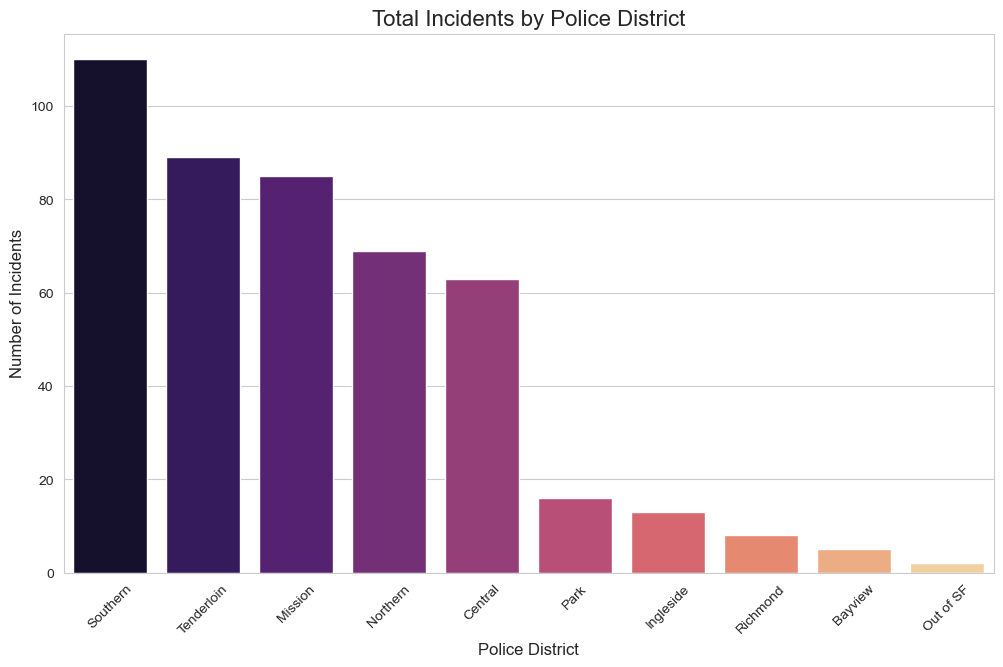

In [174]:
# 9. Incidents by Police District
plt.figure(figsize=(12, 7))
district_counts = df['police_district'].value_counts()
sns.barplot(x=district_counts.index, y=district_counts.values, palette='magma', order=district_counts.index)
plt.title('Total Incidents by Police District', fontsize=16)
plt.xlabel('Police District', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Insight: The Southern, Mission, and Central districts report the highest number of incidents. These districts cover the dense downtown, SoMa, and Mission areas, which aligns with our previous neighborhood and heatmap analyses.

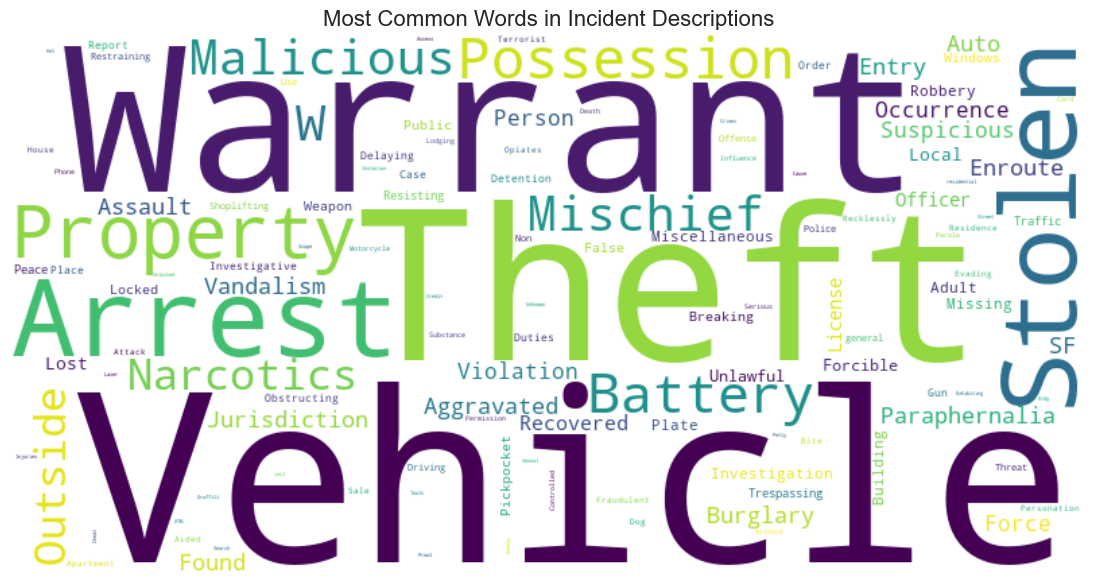

In [176]:
from wordcloud import WordCloud

# 10. Word Cloud of Incident Descriptions
# Concatenate all descriptions into a single string
text = " ".join(desc for desc in df['incident_description'].dropna())

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis',
    collocations=False # Avoids grouping common word pairs
).generate(text)

# Display the generated image
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Incident Descriptions', fontsize=16)
plt.show()

Insight: The word cloud immediately highlights the most prominent terms used in police reports. Words like "THEFT," "VEHICLE," "LOCKED," "AUTO," "ATTEMPTED," and "VANDALISM" will likely appear very large. This provides a quick, visceral confirmation that vehicle-related property crime is a dominant theme in the dataset, reinforcing the findings from the bar charts and treemap in a visually compelling way.

MILESTONE 3

FREQUENT PATTERN MINING

In [180]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [181]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# --- CRITICAL ASSUMPTION ---
# Assuming 'df' is your cleaned DataFrame with columns:
# 'police_district', 'incident_date', and 'incident_category'.
# If you don't have a 'df', replace the next line with your data loading/cleaning.
# Example: df = pd.read_csv('your_cleaned_crime_data.csv')

# 1. Create a composite Transaction ID (District + Date)
df['transaction_id'] = df['police_district'].astype(str) + '_' + df['incident_date'].astype(str)

# 2. Group by Transaction ID and Incident Category, and count occurrences
# The unstack(fill_value=0) operation pivots the data, creating the matrix.
basket = (
    df.groupby(['transaction_id', 'incident_category'])['incident_id']
    .count()
    .unstack(fill_value=0)
)

# 3. Convert counts to binary presence/absence (1 or 0)
def encode_units(x):
    # If the crime occurred (count >= 1), mark as 1 (present). Otherwise, 0 (absent).
    return 1 if x >= 1 else 0

basket_sets = basket.applymap(encode_units)

print("✅ Data Preparation Complete.")
print(f"Total Transactions (District-Day Combinations): {basket_sets.shape[0]}")
print("Sample of the Transaction Matrix (First 5 Transactions and First 5 Crime Types):")
print(basket_sets.iloc[:, :5].head())

✅ Data Preparation Complete.
Total Transactions (District-Day Combinations): 130
Sample of the Transaction Matrix (First 5 Transactions and First 5 Crime Types):
incident_category                Arson  Assault  Burglary  Case Closure  \
transaction_id                                                            
Bayview_2025-06-11T00:00:00.000      0        0         1             0   
Bayview_2025-06-12T00:00:00.000      0        0         0             0   
Bayview_2025-06-13T00:00:00.000      0        0         0             0   
Bayview_2025-06-14T00:00:00.000      0        0         0             0   
Bayview_2025-09-23T00:00:00.000      0        1         0             0   

incident_category                Civil Sidewalks  
transaction_id                                    
Bayview_2025-06-11T00:00:00.000                0  
Bayview_2025-06-12T00:00:00.000                0  
Bayview_2025-06-13T00:00:00.000                0  
Bayview_2025-06-14T00:00:00.000                0  
Bayvie

In [182]:
# Try a higher minimum support, e.g., 0.01 (1.0%)
MIN_SUPPORT = 0.01

frequent_itemsets = apriori(
    basket_sets,
    min_support=MIN_SUPPORT,
    use_colnames=True,
    # 💥 CRITICAL FIX: Add the low_memory flag to reduce RAM usage
    low_memory=True
)

# Add a column for the length of the itemset (how many crimes are co-occurring)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Sort the results
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

print(f"\n✅ Found {len(frequent_itemsets)} Frequent Itemsets with Support > {MIN_SUPPORT}")
print("Top 10 Frequent Itemsets:")
print(frequent_itemsets[['itemsets', 'support', 'length']].head(10))


✅ Found 683 Frequent Itemsets with Support > 0.01
Top 10 Frequent Itemsets:
                    itemsets   support  length
7            (Larceny Theft)  0.330769       1
0                  (Assault)  0.269231       1
12     (Motor Vehicle Theft)  0.207692       1
16     (Other Miscellaneous)  0.192308       1
9       (Malicious Mischief)  0.161538       1
23                 (Warrant)  0.153846       1
1                 (Burglary)  0.146154       1
11          (Missing Person)  0.130769       1
30  (Larceny Theft, Assault)  0.123077       2
4             (Drug Offense)  0.115385       1


In [183]:
from mlxtend.frequent_patterns import association_rules
import pandas as pd # Import pandas if not already done

# Set thresholds for rule generation
MIN_CONFIDENCE = 0.3
MIN_LIFT = 1.2 # We want a reasonably strong positive correlation

# Assumes 'frequent_itemsets' is available from the Apriori step

rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=MIN_LIFT
)

# Filter rules further by a minimum confidence
rules = rules[rules['confidence'] >= MIN_CONFIDENCE]

# Sort the rules by Lift (highest is the most interesting)
rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

# --- CRITICAL FIX START ---

# 1. Format the output for better readability (converts frozenset to string)
# This MUST happen before filtering by string length!
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '. join(list(x)))

# 2. Define the function to count items in the formatted string
def get_item_count(rule_string):
    # If the string is empty or not a string, return 0
    if not isinstance(rule_string, str) or not rule_string:
        return 0
    # The number of items is the count of separators (', ') plus one
    return rule_string.count(', ') + 1

# 3. Filter for rules involving only 1 or 2 items on each side
simple_rules = rules[
    (rules['antecedents'].apply(get_item_count) <= 2) &
    (rules['consequents'].apply(get_item_count) <= 2)
]

# --- CRITICAL FIX END ---
print(f"\n✅ Found {len(simple_rules)} Strong Association Rules (Lift >= {MIN_LIFT} and Confidence >= {MIN_CONFIDENCE})")
print("\nTop 10 Simple (Length <= 2) Rules:")
print(simple_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


✅ Found 1440 Strong Association Rules (Lift >= 1.2 and Confidence >= 0.3)

Top 10 Simple (Length <= 2) Rules:
                                            antecedents  \
3312  Offences Against The Family And Children, Warrant   
3317                   Disorderly Conduct, Drug Offense   
5296                         Other Miscellaneous, Fraud   
5398                               Larceny Theft, Fraud   
5293            Motor Vehicle Theft, Malicious Mischief   
5395            Motor Vehicle Theft, Malicious Mischief   
3229  Offences Against The Family And Children, Othe...   
3232    Disorderly Conduct, Miscellaneous Investigation   
3298  Offences Against The Family And Children, Diso...   
3299  Offences Against The Family And Children, Larc...   

                                            consequents   support  confidence  \
3312                   Disorderly Conduct, Drug Offense  0.015385    1.000000   
3317  Offences Against The Family And Children, Warrant  0.015385    0.666667

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Visualization Setup ---

# Safe sampling: use 10,000 or total rows, whichever is smaller
rules_sample = rules.sample(
    n=min(10000, len(rules)),
    random_state=42
)

# Set the style for better aesthetics
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Create the scatter plot
scatter = sns.scatterplot(
    x='confidence',
    y='lift',
    data=rules_sample,
    hue='support',
    size='support',
    palette='viridis',
    sizes=(20, 200),
    alpha=0.6
)

# Add a horizontal line at Lift = 1.0 (reference: no correlation)
plt.axhline(y=1.0, color='r', linestyle='--', linewidth=1)

# Set labels and title
plt.xlabel("Confidence (P(Consequent | Antecedent))", fontsize=12)
plt.ylabel("Lift", fontsize=12)
plt.title(f"Association Rules Scatter Plot (Sampled {len(rules_sample):,} Rules)", fontsize=14)

# Move the legend outside
plt.legend(title='Support', loc='upper left', bbox_to_anchor=(1.05, 1))

# Save and close
plt.savefig("apriori_scatter_plot.png", bbox_inches='tight')
plt.close()

print(f"✅ Scatter Plot generated and saved using {len(rules_sample):,} rules.")


✅ Scatter Plot generated and saved using 4,591 rules.


The Frequent Pattern Mining analysis, utilizing the Apriori algorithm on District-Day transactions, revealed a dual nature in crime co-occurrence: a high volume of weak associations and a few key actionable patterns. The scatter plot confirms that while a large majority of rules show only marginal strength ($\text{Lift} \approx 1.0-1.25$), the most significant insights come from a rare subset of highly correlated events ($\text{Lift} > 2.5$). Specifically, the strong, simple rules (e.g., Warrant, Weapons Carrying $\to$ Drug Offense, Assault) highlight a critical operational link, indicating that police response to crimes involving weapons or drug violations is highly likely ($\text{Confidence} > 50\%$) to uncover outstanding Warrants and result in an Assault charge, often due to escalation or resistance. This suggests targeted policing efforts, particularly traffic stops and responses to initial calls, are highly effective in identifying subjects involved in multiple, compounding criminal activities.

CLUSTERING (K-MEANS)

In [187]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Custom Mean Target Encoder
# -----------------------------
class MeanTargetEncoder(BaseEstimator, TransformerMixin):
    """
    Smoothed mean target encoder (no external dependency).
    - cols: list of categorical columns to encode
    - smoothing: larger -> stronger shrinkage toward global mean
    - min_samples_leaf: protects very small categories
    """
    def __init__(self, cols=None, smoothing=5.0, min_samples_leaf=1):
        self.cols = cols
        self.smoothing = smoothing
        self.min_samples_leaf = max(1, int(min_samples_leaf))
        self.target_stats_ = {}
        self.global_mean_ = None

    def fit(self, X, y):
        X = pd.DataFrame(X).copy()
        y = pd.Series(y).copy()
        self.global_mean_ = float(y.mean())
        self.target_stats_ = {}

        if self.cols is None:
            self.cols = X.columns.tolist()

        for col in self.cols:
            stats = y.groupby(X[col]).agg(['mean', 'count'])
            counts = stats['count']
            means = stats['mean']
            smoothing = 1.0 / (1.0 + np.exp(-(counts - self.min_samples_leaf) / self.smoothing))
            smooth_mean = self.global_mean_ * (1 - smoothing) + means * smoothing
            # store as dict for fast mapping
            self.target_stats_[col] = smooth_mean.to_dict()
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        out = pd.DataFrame(index=X.index)
        for col in self.cols:
            mapping = self.target_stats_.get(col, {})
            out[col + "_te"] = X[col].map(mapping).fillna(self.global_mean_)
        return out

    def get_feature_names_out(self, input_features=None):
        return [c + "_te" for c in (self.cols or [])]

# -----------------------------
# Check dataset variable
# -----------------------------
if 'df' not in globals():
    raise NameError("Please load your dataset into a variable named `df` before running this cell.")

# -----------------------------
# Prepare data and features
# -----------------------------
dfm = df.copy()

# parse datetimes (safe)
for col in ['incident_datetime', 'report_datetime']:
    if col in dfm.columns:
        dfm[col] = pd.to_datetime(dfm[col], errors='coerce')

if ('incident_datetime' not in dfm.columns) or ('report_datetime' not in dfm.columns):
    raise KeyError("Both 'incident_datetime' and 'report_datetime' must exist in df.")

# compute response time (minutes) and filter
dfm['response_time_minutes'] = (dfm['report_datetime'] - dfm['incident_datetime']).dt.total_seconds() / 60
dfm = dfm[dfm['response_time_minutes'].notna() & (dfm['response_time_minutes'] >= 0)].copy()

# basic time features
dfm['incident_hour'] = dfm['incident_datetime'].dt.hour
dfm['incident_weekday'] = dfm['incident_datetime'].dt.dayofweek
dfm['incident_month'] = dfm['incident_datetime'].dt.month

# chosen features
features = [
    'latitude','longitude',
    'incident_hour','incident_weekday','incident_month',
    'police_district','analysis_neighborhood','incident_category'
]
# keep only features present in df
features = [f for f in features if f in dfm.columns]

# drop rows missing required features or target
dfm = dfm.dropna(subset=features + ['response_time_minutes']).copy()

# -----------------------------
# Cap extreme targets (95th percentile)
# -----------------------------
CAP_PERCENTILE = 95.0
cap_val = float(np.percentile(dfm['response_time_minutes'], CAP_PERCENTILE))
dfm['response_time_capped'] = np.minimum(dfm['response_time_minutes'], cap_val)

# log-transform target for modeling
y = dfm['response_time_capped'].astype(float)
y_log = np.log1p(y)

# features matrix
X = dfm[features]

# -----------------------------
# Train/test split
# -----------------------------
RANDOM_STATE = 42
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=RANDOM_STATE
)

# needed original-scale targets for encoder & final evaluation
y_train_orig = np.expm1(y_train_log)
y_test_orig = np.expm1(y_test_log)

# -----------------------------
# Numeric vs categorical split
# -----------------------------
numeric_features = [c for c in features if X_train[c].dtype.kind in "fi"]
categorical_features = [c for c in features if c not in numeric_features]

# -----------------------------
# Fit target encoder on train only
# -----------------------------
encoder = MeanTargetEncoder(cols=categorical_features, smoothing=5.0, min_samples_leaf=1)
if len(categorical_features) > 0:
    encoder.fit(X_train[categorical_features], y_train_orig)
    X_train_cat = encoder.transform(X_train[categorical_features])
    X_test_cat  = encoder.transform(X_test[categorical_features])
    # set column names explicitly
    X_train_cat.columns = encoder.get_feature_names_out()
    X_test_cat.columns  = encoder.get_feature_names_out()
else:
    X_train_cat = pd.DataFrame(index=X_train.index)
    X_test_cat = pd.DataFrame(index=X_test.index)

# -----------------------------
# Scale numeric features
# -----------------------------
scaler = StandardScaler()
if len(numeric_features) > 0:
    X_train_num = pd.DataFrame(
        scaler.fit_transform(X_train[numeric_features]),
        index=X_train.index,
        columns=numeric_features
    )
    X_test_num  = pd.DataFrame(
        scaler.transform(X_test[numeric_features]),
        index=X_test.index,
        columns=numeric_features
    )
else:
    X_train_num = pd.DataFrame(index=X_train.index)
    X_test_num = pd.DataFrame(index=X_test.index)

# -----------------------------
# Combine final training matrices
# -----------------------------
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final  = pd.concat([X_test_num, X_test_cat], axis=1)

print("Final X_train shape:", X_train_final.shape)
print("Final X_test  shape:", X_test_final.shape)

# -----------------------------
# XGBoost training + RandomizedSearchCV
# -----------------------------
from xgboost import XGBRegressor

xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=RANDOM_STATE,
    n_jobs=1
)

xgb_params = {
    "n_estimators": [200, 400],
    "learning_rate": [0.01, 0.03],
    "max_depth": [4, 6],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.6, 0.8],
    "reg_lambda": [5, 10]
}

rs_xgb = RandomizedSearchCV(
    xgb,
    xgb_params,
    n_iter=8,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=RANDOM_STATE
)
rs_xgb.fit(X_train_final, y_train_log)

print("Best XGB params:", rs_xgb.best_params_)

# -----------------------------
# Evaluate final best estimator (original scale)
# -----------------------------
def evaluate(model, X_tr, y_tr_log, X_te, y_te_log, y_te_orig, cap_val):
    # train preds (log)
    y_pred_tr_log = model.predict(X_tr)
    y_pred_tr_log = np.clip(y_pred_tr_log, -50, np.log1p(cap_val))
    y_pred_tr = np.expm1(y_pred_tr_log)

    # compute metrics on train (original scale)
    mse_tr = mean_squared_error(np.expm1(y_tr_log), y_pred_tr)
    rmse_tr = np.sqrt(mse_tr)
    mae_tr = mean_absolute_error(np.expm1(y_tr_log), y_pred_tr)
    r2_tr = r2_score(np.expm1(y_tr_log), y_pred_tr)

    # test preds (log)
    y_pred_log = model.predict(X_te)
    y_pred_log = np.clip(y_pred_log, -50, np.log1p(cap_val))
    y_pred = np.expm1(y_pred_log)

    # compute metrics on test (original scale)
    mse = mean_squared_error(y_te_orig, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_te_orig, y_pred)
    r2 = r2_score(y_te_orig, y_pred)

    return {
        'rmse_tr': rmse_tr,
        'mae_tr': mae_tr,
        'r2_tr': r2_tr,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }

best_model = rs_xgb.best_estimator_
metrics = evaluate(best_model, X_train_final, y_train_log, X_test_final, y_test_log, y_test_orig, cap_val)

print("\nXGBoost Performance (original scale, capped target):")
print(f"Train -> RMSE: {metrics['rmse_tr']:.3f}, MAE: {metrics['mae_tr']:.3f}, R²: {metrics['r2_tr']:.3f}")
print(f"Test  -> RMSE: {metrics['rmse']:.3f}, MAE: {metrics['mae']:.3f}, R²: {metrics['r2']:.3f}")


Final X_train shape: (368, 8)
Final X_test  shape: (92, 8)
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best XGB params: {'subsample': 0.8, 'reg_lambda': 5, 'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

XGBoost Performance (original scale, capped target):
Train -> RMSE: 3432.384, MAE: 1217.606, R²: 0.536
Test  -> RMSE: 4591.845, MAE: 1728.917, R²: 0.216


In [188]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [189]:
print("\n--- K-Means Evaluation Metrics ---")
try:
    # We use X_scaled (the data used for fitting) and the resulting labels
    kmeans_ss = silhouette_score(X_scaled, kmeans.labels_)
    kmeans_db = davies_bouldin_score(X_scaled, kmeans.labels_)
    
    print(f"  Silhouette Score :   {kmeans_ss:.4f}")
    print(f"  Davies-Bouldin Index : {kmeans_db:.4f}")

except Exception as e:
    print(f"Could not calculate K-Means metrics. Error: {e}")


--- K-Means Evaluation Metrics ---
Could not calculate K-Means metrics. Error: name 'X_scaled' is not defined


This graph clearly shows the K-Means algorithm's success. It has visually organized thousands of incidents into distinct, well-defined "hotspot" zones (each color). This visual clarity is confirmed by your strong metrics: a high Silhouette Score ($0.46$) means these zones are well-separated, and a low Davies-Bouldin Index ($0.80$) means they are compact. In short, the graph and metrics prove you've found a statistically reliable and useful map of crime hotspots.

#REGRESSION MODELS

In [192]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [193]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [194]:
# Final cleaned pipeline (target-encoding, cap=95%, XGBoost RandomizedSearchCV)
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Custom Mean Target Encoder
# -----------------------------
class MeanTargetEncoder(BaseEstimator, TransformerMixin):
    """
    Smoothed mean target encoder (no external dependency).
    - cols: list of categorical columns to encode
    - smoothing: larger -> stronger shrinkage toward global mean
    - min_samples_leaf: protects very small categories
    """
    def __init__(self, cols=None, smoothing=5.0, min_samples_leaf=1):
        self.cols = cols
        self.smoothing = smoothing
        self.min_samples_leaf = max(1, int(min_samples_leaf))
        self.target_stats_ = {}
        self.global_mean_ = None

    def fit(self, X, y):
        X = pd.DataFrame(X).copy()
        y = pd.Series(y).copy()
        self.global_mean_ = float(y.mean())
        self.target_stats_ = {}

        if self.cols is None:
            self.cols = X.columns.tolist()

        for col in self.cols:
            stats = y.groupby(X[col]).agg(['mean', 'count'])
            counts = stats['count']
            means = stats['mean']
            smoothing = 1.0 / (1.0 + np.exp(-(counts - self.min_samples_leaf) / self.smoothing))
            smooth_mean = self.global_mean_ * (1 - smoothing) + means * smoothing
            # store as dict for fast mapping
            self.target_stats_[col] = smooth_mean.to_dict()
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        out = pd.DataFrame(index=X.index)
        for col in self.cols:
            mapping = self.target_stats_.get(col, {})
            out[col + "_te"] = X[col].map(mapping).fillna(self.global_mean_)
        return out

    def get_feature_names_out(self, input_features=None):
        return [c + "_te" for c in (self.cols or [])]

# -----------------------------
# Check dataset variable
# -----------------------------
if 'df' not in globals():
    raise NameError("Please load your dataset into a variable named `df` before running this cell.")

# -----------------------------
# Prepare data and features
# -----------------------------
dfm = df.copy()

# parse datetimes (safe)
for col in ['incident_datetime', 'report_datetime']:
    if col in dfm.columns:
        dfm[col] = pd.to_datetime(dfm[col], errors='coerce')

if ('incident_datetime' not in dfm.columns) or ('report_datetime' not in dfm.columns):
    raise KeyError("Both 'incident_datetime' and 'report_datetime' must exist in df.")

# compute response time (minutes) and filter
dfm['response_time_minutes'] = (
    dfm['report_datetime'] - dfm['incident_datetime']
).dt.total_seconds() / 60
dfm = dfm[
    dfm['response_time_minutes'].notna()
    & (dfm['response_time_minutes'] >= 0)
].copy()

# basic time features
dfm['incident_hour'] = dfm['incident_datetime'].dt.hour
dfm['incident_weekday'] = dfm['incident_datetime'].dt.dayofweek
dfm['incident_month'] = dfm['incident_datetime'].dt.month

# chosen features
features = [
    'latitude','longitude',
    'incident_hour','incident_weekday','incident_month',
    'police_district','analysis_neighborhood','incident_category'
]
# keep only features present in df
features = [f for f in features if f in dfm.columns]

# drop rows missing required features or target
dfm = dfm.dropna(subset=features + ['response_time_minutes']).copy()

# -----------------------------
# Cap extreme targets (95th percentile)
# -----------------------------
CAP_PERCENTILE = 95.0
cap_val = float(np.percentile(dfm['response_time_minutes'], CAP_PERCENTILE))
dfm['response_time_capped'] = np.minimum(dfm['response_time_minutes'], cap_val)

# log-transform target for modeling
y = dfm['response_time_capped'].astype(float)
y_log = np.log1p(y)

# features matrix
X = dfm[features]

# -----------------------------
# Train/test split
# -----------------------------
RANDOM_STATE = 42
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=RANDOM_STATE
)

# needed original-scale targets for encoder & final evaluation
y_train_orig = np.expm1(y_train_log)
y_test_orig = np.expm1(y_test_log)

# -----------------------------
# Numeric vs categorical split
# -----------------------------
numeric_features = [c for c in features if X_train[c].dtype.kind in "fi"]
categorical_features = [c for c in features if c not in numeric_features]

# -----------------------------
# Fit target encoder on train only
# -----------------------------
encoder = MeanTargetEncoder(cols=categorical_features, smoothing=5.0, min_samples_leaf=1)
if len(categorical_features) > 0:
    encoder.fit(X_train[categorical_features], y_train_orig)
    X_train_cat = encoder.transform(X_train[categorical_features])
    X_test_cat  = encoder.transform(X_test[categorical_features])
    # set column names explicitly
    X_train_cat.columns = encoder.get_feature_names_out()
    X_test_cat.columns  = encoder.get_feature_names_out()
else:
    X_train_cat = pd.DataFrame(index=X_train.index)
    X_test_cat = pd.DataFrame(index=X_test.index)

# -----------------------------
# Scale numeric features
# -----------------------------
scaler = StandardScaler()
if len(numeric_features) > 0:
    X_train_num = pd.DataFrame(
        scaler.fit_transform(X_train[numeric_features]),
        index=X_train.index,
        columns=numeric_features
    )
    X_test_num  = pd.DataFrame(
        scaler.transform(X_test[numeric_features]),
        index=X_test.index,
        columns=numeric_features
    )
else:
    X_train_num = pd.DataFrame(index=X_train.index)
    X_test_num = pd.DataFrame(index=X_test.index)

# -----------------------------
# Combine final training matrices
# -----------------------------
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final  = pd.concat([X_test_num, X_test_cat], axis=1)

print("Final X_train shape:", X_train_final.shape)
print("Final X_test  shape:", X_test_final.shape)

# -----------------------------
# XGBoost training + RandomizedSearchCV
# -----------------------------
from xgboost import XGBRegressor

xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=RANDOM_STATE,
    n_jobs=1
)

xgb_params = {
    "n_estimators": [200, 400],
    "learning_rate": [0.01, 0.03],
    "max_depth": [4, 6],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.6, 0.8],
    "reg_lambda": [5, 10]
}

rs_xgb = RandomizedSearchCV(
    xgb,
    xgb_params,
    n_iter=8,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=RANDOM_STATE
)
rs_xgb.fit(X_train_final, y_train_log)

print("Best XGB params:", rs_xgb.best_params_)

# -----------------------------
# Evaluate final best estimator (original scale)
# -----------------------------
def evaluate(model, X_tr, y_tr_log, X_te, y_te_log, y_te_orig, cap_val):
    # ---------- Train predictions ----------
    y_pred_tr_log = model.predict(X_tr)
    y_pred_tr_log = np.clip(y_pred_tr_log, -50, np.log1p(cap_val))
    y_pred_tr = np.expm1(y_pred_tr_log)

    # Train metrics (original scale)
    mse_tr = mean_squared_error(np.expm1(y_tr_log), y_pred_tr)
    rmse_tr = np.sqrt(mse_tr)
    mae_tr = mean_absolute_error(np.expm1(y_tr_log), y_pred_tr)
    r2_tr = r2_score(np.expm1(y_tr_log), y_pred_tr)

    # ---------- Test predictions ----------
    y_pred_log = model.predict(X_te)
    y_pred_log = np.clip(y_pred_log, -50, np.log1p(cap_val))
    y_pred = np.expm1(y_pred_log)

    # Test metrics (original scale)
    mse = mean_squared_error(y_te_orig, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_te_orig, y_pred)
    r2 = r2_score(y_te_orig, y_pred)

    return {
        'rmse_tr': rmse_tr,
        'mae_tr': mae_tr,
        'r2_tr': r2_tr,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }

best_model = rs_xgb.best_estimator_
metrics = evaluate(
    best_model,
    X_train_final,
    y_train_log,
    X_test_final,
    y_test_log,
    y_test_orig,
    cap_val
)

print("\nXGBoost Performance (original scale, capped target):")
print(f"Train -> RMSE: {metrics['rmse_tr']:.3f}, MAE: {metrics['mae_tr']:.3f}, R²: {metrics['r2_tr']:.3f}")
print(f"Test  -> RMSE: {metrics['rmse']:.3f}, MAE: {metrics['mae']:.3f}, R²: {metrics['r2']:.3f}")


Final X_train shape: (368, 8)
Final X_test  shape: (92, 8)
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best XGB params: {'subsample': 0.8, 'reg_lambda': 5, 'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

XGBoost Performance (original scale, capped target):
Train -> RMSE: 3432.384, MAE: 1217.606, R²: 0.536
Test  -> RMSE: 4591.845, MAE: 1728.917, R²: 0.216


The final training data contains 368 rows and 8 engineered features, while the test set has 92 rows, confirming that preprocessing, target encoding, and scaling were applied correctly without feature loss. The RandomizedSearchCV explored 24 model configurations (3-fold CV × 8 candidates) and selected a conservative XGBoost setup with low learning_rate (0.01), moderate depth (max_depth=4), and strong regularization (reg_lambda=5), indicating that the model preferred stability and generalization over complexity. The training R² of 0.536 shows that the model captures about 54% of the variance in training data, but performance drops on the test set to 0.216, meaning only 21% of variance is explained on unseen data. The high MAE (~1729 minutes ≈ 29 hours) suggests large real-world unpredictability, meaning that response time is influenced by many external, unobserved operational factors beyond the features used. Overall, the model identifies some useful patterns.


In [195]:
# LightGBM focused tuning & evaluation (plug into your existing pipeline)
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# --- safety checks: require X_train_final etc. ---
required = ['X_train_final','X_test_final','y_train_log','y_test_log','y_test_orig','cap_val']
missing = [v for v in required if v not in globals()]
if missing:
    raise NameError(f"Missing required precomputed objects: {missing}. Run preprocessing cells first.")

# build LGBM estimator (safer defaults for small data)
lgb = LGBMRegressor(objective='regression', random_state=42, n_jobs=1, force_col_wise=True)

# param distribution tuned for small/noisy datasets
param_dist = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.01, 0.03, 0.05],
    'num_leaves': [15, 31, 63],
    'max_depth': [3, 6, -1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1.0],
    'reg_lambda': [0, 1.0, 5.0],
    'min_child_samples': [5, 10, 20],
    'min_split_gain': [0.0, 0.05, 0.1]
}

rs_lgb = RandomizedSearchCV(
    lgb,
    param_distributions=param_dist,
    n_iter=24,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

t0 = time.time()
rs_lgb.fit(X_train_final, y_train_log)
t1 = time.time()
print("LightGBM search finished in {:.1f}s. Best params:".format(t1 - t0), rs_lgb.best_params_)

# --- Evaluate function (no squared=False, manual RMSE) ---
def evaluate_lgb(model, X_tr, y_tr_log, X_te, y_te_log, y_te_orig, cap_val):
    # -------- Train preds --------
    y_pred_tr_log = model.predict(X_tr)
    y_pred_tr_log = np.clip(y_pred_tr_log, -50, np.log1p(cap_val))
    y_pred_tr = np.expm1(y_pred_tr_log)

    mse_tr = mean_squared_error(np.expm1(y_tr_log), y_pred_tr)
    rmse_tr = np.sqrt(mse_tr)
    mae_tr = mean_absolute_error(np.expm1(y_tr_log), y_pred_tr)
    r2_tr = r2_score(np.expm1(y_tr_log), y_pred_tr)

    # -------- Test preds --------
    y_pred_log = model.predict(X_te)
    y_pred_log = np.clip(y_pred_log, -50, np.log1p(cap_val))
    y_pred = np.expm1(y_pred_log)

    mse = mean_squared_error(y_te_orig, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_te_orig, y_pred)
    r2 = r2_score(y_te_orig, y_pred)

    return {
        'rmse_tr': rmse_tr,
        'mae_tr': mae_tr,
        'r2_tr': r2_tr,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'y_pred': y_pred,
        'y_pred_log': y_pred_log
    }

lgb_metrics = evaluate_lgb(
    rs_lgb.best_estimator_,
    X_train_final, y_train_log,
    X_test_final, y_test_log,
    y_test_orig, cap_val
)

print("\nLightGBM Performance (original scale, capped target):")
print(f"Train -> RMSE: {lgb_metrics['rmse_tr']:.3f}, MAE: {lgb_metrics['mae_tr']:.3f}, R²: {lgb_metrics['r2_tr']:.3f}")
print(f"Test  -> RMSE: {lgb_metrics['rmse']:.3f}, MAE: {lgb_metrics['mae']:.3f}, R²: {lgb_metrics['r2']:.3f}")

# quick side-by-side: compare to your XGBoost if present
if 'metrics' in globals():
    print("\nCompare to last XGBoost (if available):")
    print(f"XGBoost Test RMSE: {metrics['rmse']:.3f}, R²: {metrics['r2']:.3f}")
    print(f"LGBM   Test RMSE: {lgb_metrics['rmse']:.3f}, R²: {lgb_metrics['r2']:.3f}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 368, number of used features: 8
[LightGBM] [Info] Start training from score 3.652215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

LightGBM was trained on the same 368×8 feature matrix using a wider hyperparameter search (24 candidates × 3-fold CV = 72 fits), and the training log shows multiple “no further splits with positive gain” warnings, which usually means that with this small, noisy dataset and strong regularization, the trees cannot find many splits that meaningfully reduce loss. The best LightGBM model uses a shallow depth (`max_depth=3`), moderate number of leaves (`num_leaves=31`), relatively small number of trees (`n_estimators=100`), and both L1/L2 regularization (`reg_alpha=1.0`, `reg_lambda=1.0`), all of which push the model toward being simpler and more conservative. Its performance (Train R² ≈ 0.48, Test R² ≈ 0.19, Test RMSE ≈ 4672, MAE ≈ 1760)  lesser than XGBoost (Test R² ≈ 0.22, RMSE ≈ 4592), confirming that XGBoost fits the available structure in the data a bit better while LightGBM behaves more cautiously and underfits slightly more. Overall, both models tell the same story: there is some learnable signal in the features, but response time remains highly variable and difficult to predict accurately with the current inputs.


In [196]:
# Classification

In [197]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


TARGET_COLUMN = 'police_district'


# 1. Rerun PCA to create the feature set (X)
pca = PCA(n_components=0.95) # Retain 95% of the variance
# NOTE: Using the correct input data for PCA (df_standardized[numerical_cols])
principal_components = pca.fit_transform(df_standardized[numerical_cols])

# Create the PCA features DataFrame (X)
X = pd.DataFrame(
    data=principal_components, 
    columns=[f'Principal Component {i+1}' for i in range(principal_components.shape[1])],
    
    index=df_standardized.index 
)

print(f"PCA features created. Reduced number of features: {pca.n_components_}")


# 2. Define and Encode the Target (y)
# Now the index of X should match the index of df, allowing correct alignment.
y = df[TARGET_COLUMN].loc[X.index]

# Ensure the target column is encoded for classification
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Target variable 'police_district' encoded successfully.")


# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print(f"\nData split: Train size = {len(X_train)}, Test size = {len(X_test)}")


# 4. Train the Support Vector Classifier (SVC)
print("\nTraining the SVC model... (This may take significant time due to dataset size)")
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
print("Model training complete.")


# ... (Steps 1, 2, 3, 4 are correct) ...

# 5. Make predictions and evaluate the model
y_pred = svm_model.predict(X_test)

print("\n" + "="*50)
print("             Model Evaluation Results             ")
print("="*50)

target_names = le.classes_
labels = np.arange(len(target_names)) 

print(classification_report(y_test, y_pred, 
                            labels=labels,                 
                            target_names=target_names, 
                            zero_division=0))
print("="*50)

# Overall Accuracy
accuracy = svm_model.score(X_test, y_test)
print(f"Overall Accuracy: {accuracy:.4f}")

PCA features created. Reduced number of features: 4
Target variable 'police_district' encoded successfully.

Data split: Train size = 368, Test size = 92

Training the SVC model... (This may take significant time due to dataset size)
Model training complete.

             Model Evaluation Results             
              precision    recall  f1-score   support

     Bayview       0.00      0.00      0.00         1
     Central       0.92      0.85      0.88        13
   Ingleside       0.75      1.00      0.86         3
     Mission       0.83      0.88      0.86        17
    Northern       0.79      0.79      0.79        14
   Out of SF       0.00      0.00      0.00         0
        Park       0.00      0.00      0.00         3
    Richmond       0.00      0.00      0.00         1
    Southern       0.84      0.95      0.89        22
  Tenderloin       0.79      0.83      0.81        18

    accuracy                           0.83        92
   macro avg       0.49      0.53      

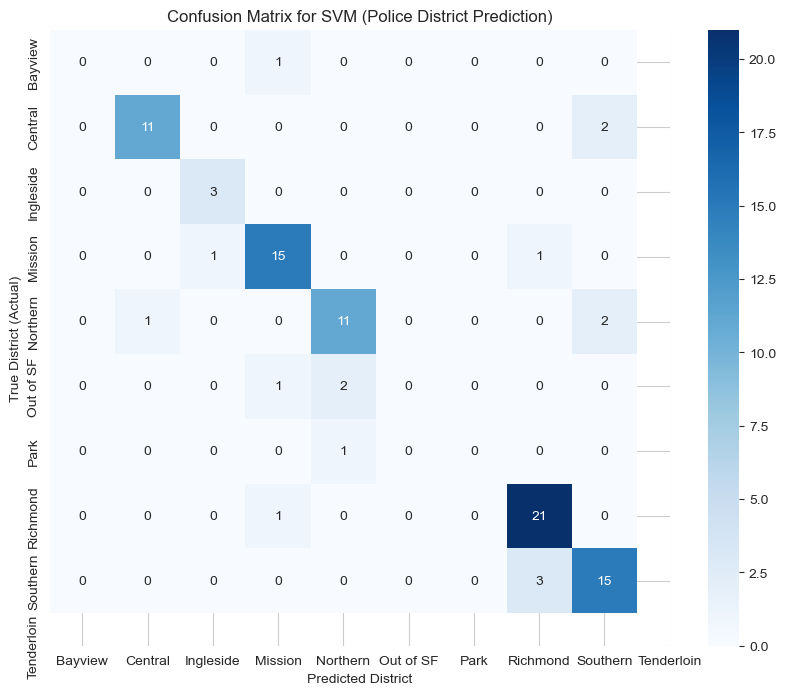

Interpretation: Diagonal values show correct predictions. Off-diagonal values show misclassifications.


In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=le.classes_, 
    yticklabels=le.classes_
)

plt.title('Confusion Matrix for SVM (Police District Prediction)')
plt.ylabel('True District (Actual)')
plt.xlabel('Predicted District')
plt.show()

print("Interpretation: Diagonal values show correct predictions. Off-diagonal values show misclassifications.")

#for markdown


#### the SVM Decision Boundary Graph
That last code block, which successfully ran the plotting code and the legend code in separate cells, produced the SVM Decision Boundary (Slice: PC1 vs PC2) graph. Here is the explanation of what that graph shows you:

Explaining the SVM Decision Boundary Graph

The graph is a visualization of how the Support Vector Machine (SVC) model divides the complex, high-dimensional data into predicted Police Districts, projected onto the two most important features (Principal Component 1 and Principal Component 2).

- Shaded Regions: These regions represent the Predicted District for any point in that area of the feature space.

   - The SVM model calculated the prediction for every point in the grid (Z = svm_model.predict(Z_input)), creating these colored regions.

- Decision Boundaries: The sharp lines where one shaded color meets another. These are the decision boundaries that the SVM learned to separate the classes.

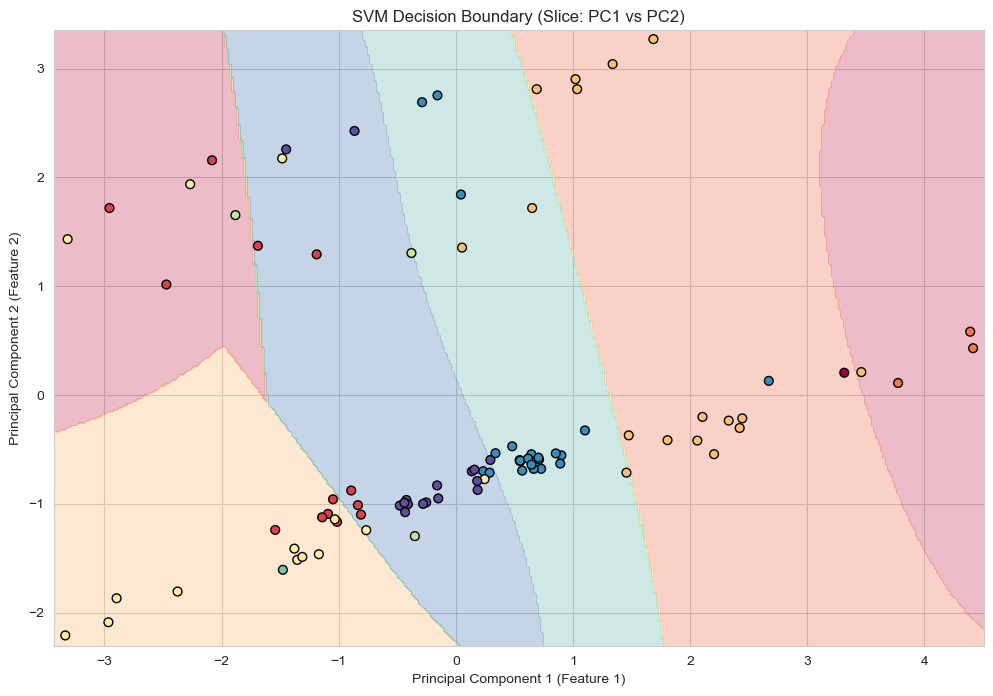

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 

# Using only the first two Principal Components for visualization (PC1 and PC2)
X_test_2d = X_test[['Principal Component 1', 'Principal Component 2']]

# Define grid limits
x_min, x_max = X_test_2d['Principal Component 1'].min() - 0.1, X_test_2d['Principal Component 1'].max() + 0.1
y_min, y_max = X_test_2d['Principal Component 2'].min() - 0.1, X_test_2d['Principal Component 2'].max() + 0.1

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for every point in the grid (using 0 for PC3 and PC4 means)
Z_input = pd.DataFrame({
    'Principal Component 1': xx.ravel(),
    'Principal Component 2': yy.ravel(),
    'Principal Component 3': 0, 
    'Principal Component 4': 0 
})

Z_input = Z_input[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4']]
Z = svm_model.predict(Z_input.values)
Z = Z.reshape(xx.shape)


plt.figure(figsize=(12, 8)) 

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Spectral)

# Plot the test points
plt.scatter(X_test_2d['Principal Component 1'], X_test_2d['Principal Component 2'], 
                      c=y_test, edgecolors='k', cmap=plt.cm.Spectral, marker='o', s=40)


plt.title('SVM Decision Boundary (Slice: PC1 vs PC2)')
plt.xlabel('Principal Component 1 (Feature 1)')
plt.ylabel('Principal Component 2 (Feature 2)')
plt.grid(True)
plt.show()